**PROYECTO CAPSTONE - ANÁLISIS DE CALIFICACIÓN DE CRÉDITO PARA INSTITUCIONES FINANCIERAS**

**1.- CONFIGURACIÓN DEL ENTORNO DE TRABAJO:**

In [1]:
# Importación de bibliotecas
import numpy as np              # Biblioteca para operaciones numéricas y manejo de matrices
import pandas as pd             # Biblioteca para manipulación y análisis de datos, especialmente para dataframes
import seaborn as sns           # Biblioteca para la visualización de datos basada en matplotlib, interfaz de alto nivel
import missingno                # Biblioteca para visualizar datos faltantes en pandas dataframes
import matplotlib.pyplot as plt # Biblioteca fundamental para la creación de gráficos en Python

# Configuración de Matplotlib
# Wizard de Jupyter Notebook que permite mostrar gráficos en línea dentro de él
%matplotlib inline                       
plt.rcParams["figure.figsize"] = (12, 6) # Configura el tamaño predeterminado de las figuras generadas
                                         # con matplotlib a 12x6 pulgadas

# Configuración de Seaborn
sns.set_style("whitegrid") # Establece el estilo de los gráficos de seaborn añadiendo un fondo blanco con una cuadrícula

# Gestión de advertencias
import warnings                     # Importa el módulo de advertencias de Python
warnings.filterwarnings("ignore")   # Configura el entorno para ignorar todas las advertencias
warnings.warn("this will not show") # Genera una advertencia que será ignorada debido a la configuración anterior

# Configuración de Pandas
pd.set_option('display.float_format', lambda x: '%.2f' % x) # Establece el formato de visualización de números flotantes
                                                            # en pandas a 2 decimales

**2.- CONFIGURACIONES ADICIONALES:**

In [2]:
# Importación de TensorFlow y Keras:
import tensorflow as tf # Biblioteca de código abierto par el aprendizaje automático

from tensorflow.keras.models import Sequential                 # Clase de Keras para crear un modelo secuencial
from tensorflow.keras.layers import Dense, Activation, Dropout # Capas de la red neuronal
                                                               # Dense es una capa completamente conectada
                                                               # Activation aplica una función de activación
                                                               # Dropout aplica regularización mediante el 
                                                               # abandono de neuronas aleatoriamente durante el entrenamiento
from tensorflow.keras.callbacks import EarlyStopping # Callback de Keras para detener el entrenamiento temprano si la mejora
                                                     # se estanca
from tensorflow.keras.saving import save_model       # Función para guardar el modelo entrenado

# Capas adicionales y optimizadores de Keras:
from keras.layers import BatchNormalization # Capa que normaliza la activación de la capa anterior
from keras.optimizers import Adam           # Optimizador basado en el método de descenso de gradiente estocástico
from keras.regularizers import l2           # Regularizador l2 para prevenir el sobreajuste

# Preprocesamiento de datos con Scikit-Learn:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder # Codificadores para transformar variables categóricas
from sklearn.preprocessing import StandardScaler,LabelEncoder   # Escalador que normaliza los datos para tener 
                                                                # media 0 y desviación estándar 1
                                                                # Codifica etiquetas con valores entre 0 y n-1
from sklearn.preprocessing import MinMaxScaler                      # Escalador que normaliza los datos a un rango específico

# Modelos y validación con Scikit-Learn:
from sklearn.model_selection import cross_val_score, cross_validate # Funciones para evaluar un modelo mediante 
                                                                    # validación cruzada
from sklearn.model_selection import GridSearchCV     # Búsqueda en cuadrícula para la optimización de hiperparámetros
from sklearn.model_selection import train_test_split # Divide los datos en conjuntos de entrenamiento y prueba
from sklearn.linear_model import LogisticRegression  # Modelo de regresión logística
from sklearn.ensemble import RandomForestClassifier  # Clasificador de bosque aleatorio
from sklearn.neural_network import MLPClassifier     # Clasificador con red neuronal MLP(Perceptrón Multicapa)

# Métricas de evaluación con Scikit-Learn:
from sklearn.metrics import classification_report, confusion_matrix # Genera un reporte con métricas de clasificación
                                                                    # Matriz de confusión para evaluar el rendimiento
                                                                    # de un clasificador
from sklearn.metrics import roc_auc_score, roc_curve                        # Métricas para evaluar el área bajo la curva ROC
from sklearn.metrics import precision_recall_curve, average_precision_score # Curva de precisión-recall y su puntaje promedio
from sklearn.metrics import accuracy_score

# Técnicas de sobremuestreo con imbalanced-learn:
from imblearn.over_sampling import SMOTE # Técnica de sobremuestreo para manejar conjuntos de datos desequilibrados creando
                                         # ejemplos sintéticos

**3.- LEER Y VISUALIZAR EL ARCHIVO CSV DE BASE DE DATOS:**

In [3]:
#train = pd.read_csv('/kaggle/input/credit-score-classification/train.csv', dtype={'Column26': str})

train = pd.read_csv('C:/Entrenamiento.csv')
train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.84,3,...,_,809.98,26.82,22 Years and 1 Months,No,49.57,80.41529544,High_spent_Small_value_payments,312.4940887,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.94,NaN,No,49.57,118.2802216,Low_spent_Large_value_payments,284.6291625,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.61,22 Years and 3 Months,No,49.57,81.69952126,Low_spent_Medium_value_payments,331.2098629,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.38,22 Years and 4 Months,No,49.57,199.4580744,Low_spent_Small_value_payments,223.4513097,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.84,3,...,Good,809.98,24.80,22 Years and 5 Months,No,49.57,41.42015309,High_spent_Medium_value_payments,341.489231,Good


In [4]:
print(train.shape)

(100000, 28)


**4.- PASAR LA INFORMACIÓN DEL DATASET TRAIN ORIGINAL A DATAFRAME PARA TRABAJAR CON ESTE EN ADELANTE:**

In [5]:
df = train

**INICIAR CON EL ANÁLISIS EXPLORATORIO DE DATOS (EDA):**

**5.- VISUALIZAR LOS TIPOS DE DATOS Y CONTEO DE ELEMENTOS NULOS DEL DATASET:**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [7]:
df.shape

(100000, 28)

**6.- VALIDAR FILAS DUPLICADAS:**

In [8]:
df.duplicated().sum()

0

**7.- MOSTRAR LOS ESTADÍSTICOS INICIALES DE LOS CAMPOS NUMÉRICOS DEL DATASET:**

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.00,4194.17,3183.69,303.65,1625.57,3093.74,5957.45,15204.63
Num_Bank_Accounts,100000.00,17.09,117.40,-1.00,3.00,6.00,7.00,1798.00
Num_Credit_Card,100000.00,22.47,129.06,0.00,4.00,5.00,7.00,1499.00
Interest_Rate,100000.00,72.47,466.42,1.00,8.00,13.00,20.00,5797.00
Delay_from_due_date,100000.00,21.07,14.86,-5.00,10.00,18.00,28.00,67.00
Num_Credit_Inquiries,98035.00,27.75,193.18,0.00,3.00,6.00,9.00,2597.00
Credit_Utilization_Ratio,100000.00,32.29,5.12,20.00,28.05,32.31,36.50,50.00
Total_EMI_per_month,100000.00,1403.12,8306.04,0.00,30.31,69.25,161.22,82331.00


**8.- INCLUIR LAS ESTADÍSTICAS INICIALES DE LOS CAMPOS NO NUMÉRICOS DEL DATASET:**

In [10]:
df.describe(include='object').T

,count,unique,top,freq
ID,100000,100000,0x1602,1
Customer_ID,100000,12500,CUS_0xd40,8
Month,100000,8,January,12500
Name,90015,10139,Langep,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


**9.- CONTAR VALORES NULOS POR CADA VARIABLE:**

In [11]:
df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

**10.- CONSOLIDAR POR SEPARADO SOLAMENTE LAS VARIABLES CON DATOS NULOS:**

In [12]:
df.isna().sum()[df.isna().sum() > 0]

Name                        9985
Monthly_Inhand_Salary      15002
Type_of_Loan               11408
Num_of_Delayed_Payment      7002
Num_Credit_Inquiries        1965
Credit_History_Age          9030
Amount_invested_monthly     4479
Monthly_Balance             1200
dtype: int64

**11.- VISUALIZAR EL VOLUMEN DE DATOS NULOS COMPARADOS CON EL TOTAL:**

Este código define una función na_ratio_plot que crea un gráfico de distribución (displot) para visualizar la proporción de datos faltantes en cada característica de un DataFrame.

Esto es útil para identificar rápidamente qué variables tienen muchos valores faltantes y deben ser manejadas en el análisis o en la preparación de datos antes del modelado.

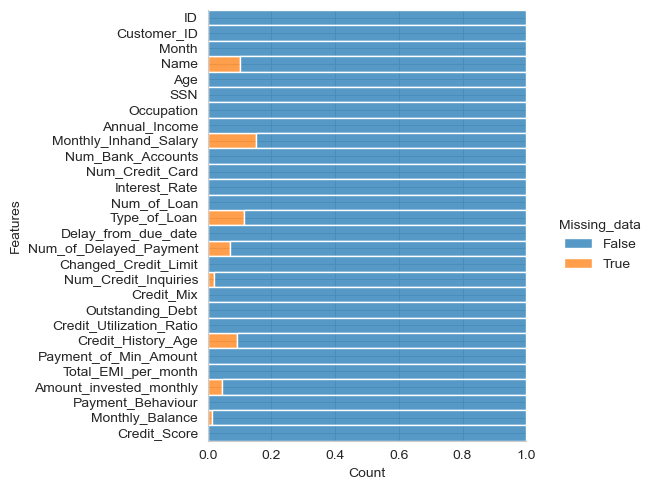

In [13]:
def na_ratio_plot(df=df):

    sns.displot(df.isna().melt(value_name='Missing_data',var_name='Features')\
                ,y='Features',hue='Missing_data',multiple='fill',aspect=9/8)

na_ratio_plot()

**LIMPIEZA, CONVERSIÓN Y TRANSFORMACIÓN DE DATOS**

**12.- MONTH: MOSTRAR LOS MESES SEGÚN SU NÚMERO ORDINAL EN LUGAR DE TEXTO**

In [14]:
df.Month.value_counts()

Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: count, dtype: int64

In [15]:
df.Month.unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August'], dtype=object)

In [16]:
dict = {"January" : 1,"February" : 2,"March" : 3,"April" : 4,"May" : 5,"June" : 6,"July" : 7,"August" : 8}
df["Month"] = df["Month"].map(dict)

dict

{'January': 1,
 'February': 2,
 'March': 3,
 'April': 4,
 'May': 5,
 'June': 6,
 'July': 7,
 'August': 8}

**13.- AGE: LIMPIAR CARACTERES EXTRAÑOS Y TRANSFORMAR EDADES FUERA DE RANGOS LÓGICOS**

Este código está diseñado para limpiar y convertir una columna de edades en un DataFrame df.
Limpia los valores de la columna Age eliminando caracteres especiales y luego convierte los valores a enteros, manejando los casos en los que la conversión no es posible devolviendo None.

In [17]:
# La función clean_age toma un valor age y trata de convertirlo a un entero
def clean_age(age):
    try:
        return int(age) # Si la conversión es exitosa (try), devuelve el valor convertido a entero
    except ValueError:
        return None     # Si ocurre un ValueError (es decir, si el valor no puede convertirse a un entero), devuelve None.

# Limpieza y conversión de la columna Age en el DataFrame df:
df['Age'] = df['Age'].str.replace('_', '').str.replace('-', '')
df['Age'] = df['Age'].apply(clean_age)

Este código define una función que trunca los dos últimos dígitos de la edad si la edad es mayor que 99, y luego aplica esta función a la columna Age de un DataFrame df.
Trunca los dos últimos dígitos de las edades que son mayores que 99, dejando las demás edades sin cambios.

In [18]:
def truncate_last_two_digits(age):
    if age > 99:
        return age // 100
    else:
        return age


df['Age'] = df['Age'].apply(truncate_last_two_digits)

df.Age

0        23
1        23
2         5
3        23
4        23
         ..
99995    25
99996    25
99997    25
99998    25
99999    25
Name: Age, Length: 100000, dtype: int64

Este código crea y muestra un gráfico de barras que visualiza la distribución de edades en el DataFrame df, con un tamaño de figura específico, etiquetas y rotación de etiquetas del eje x para una mejor presentación. Este tipo de gráfico es útil para entender la frecuencia de diferentes edades en el conjunto de datos.

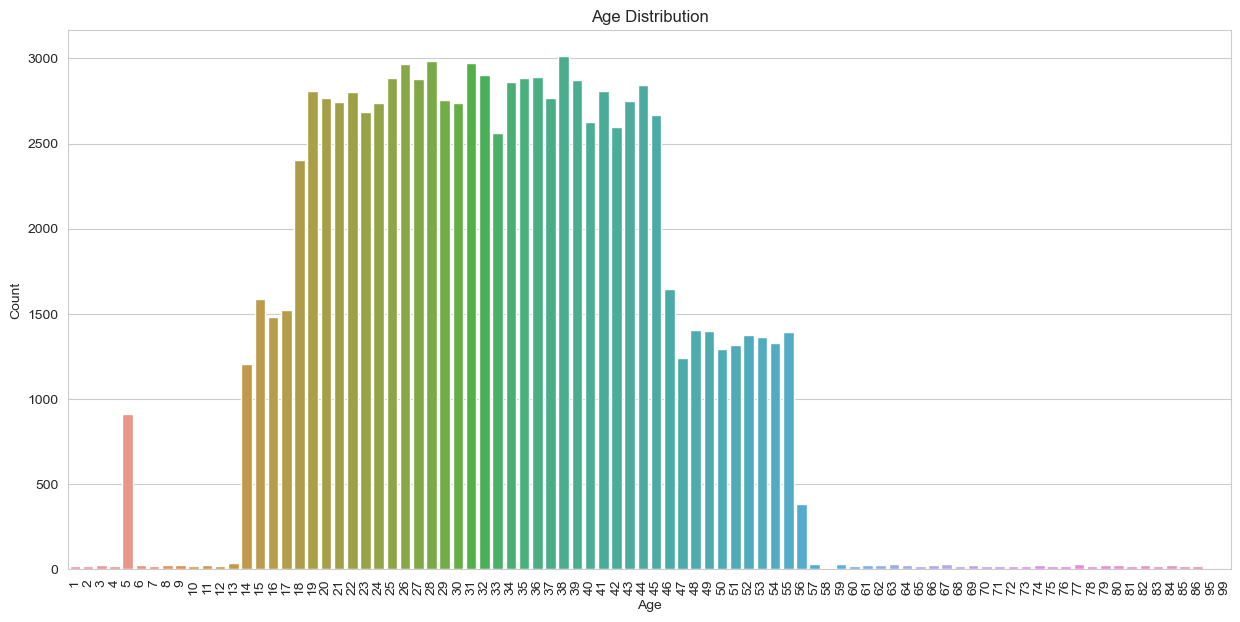

In [19]:
plt.figure(figsize=(15, 7))
sns.countplot(x='Age', data=df)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=90)  
plt.show()

Este código genera un gráfico de distribución (histograma y densidad de kernel) para visualizar la distribución de la columna Age en el DataFrame df utilizando Seaborn y Matplotlib. Además, muestra la asimetría (skewness) de la distribución en la leyenda.

La leyenda del gráfico indicará la asimetría de la distribución de las edades. La asimetría proporciona información sobre la simetría de la distribución; un valor de asimetría cercano a 0 indica una distribución simétrica, mientras que valores positivos o negativos indican distribuciones sesgadas a la derecha o a la izquierda, respectivamente.

Text(0.5, 1.0, 'Customer Age Distribution')

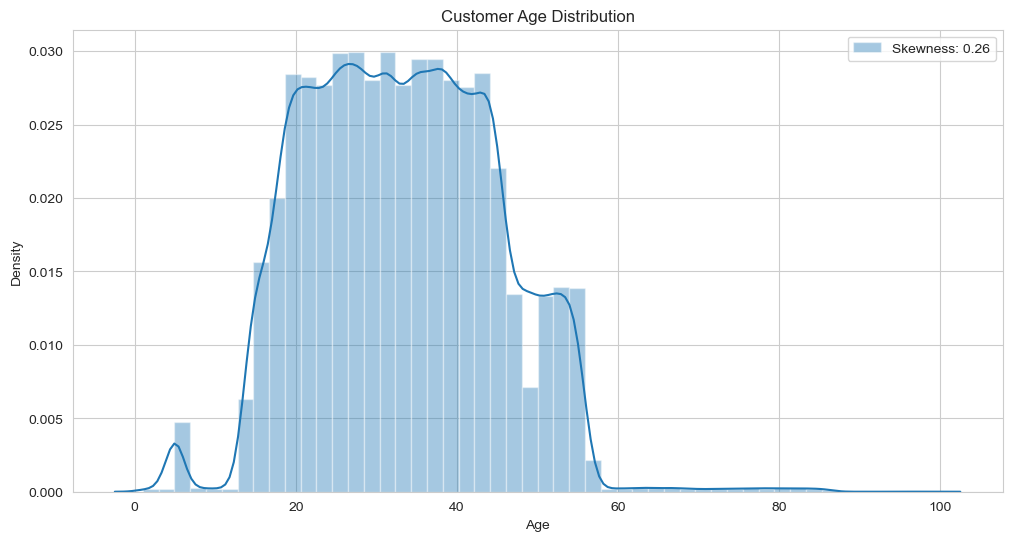

In [20]:
sns.distplot(df['Age'], label = 'Skewness: %.2f'%(df['Age'].skew()))
plt.legend(loc = 'best')
plt.title('Customer Age Distribution')

**14.- ANNUAL_INCOME: LIMPIAR CARACTERES EXTRAÑOS Y CONVERTIR DE TIPO OBJECT A FLOAT**

Este código limpia la columna Annual_Income eliminando los guiones bajos finales, convierte los valores a tipo float y obtiene los valores únicos en la columna.

In [21]:
def remove_trailing_dash(value):
    if isinstance(value, str) and value.endswith('_'):
        return value[:-1]
    else:
        return value


df['Annual_Income'] = df['Annual_Income'].apply(remove_trailing_dash)

df['Annual_Income'] = df['Annual_Income'].astype(float)

df['Annual_Income'].unique()


array([ 19114.12,  34847.84, 143162.64, ...,  37188.1 ,  20002.88,
        39628.99])

El diagrama de caja resultante ayudará a visualizar la distribución, la mediana, y los valores atípicos del ingreso anual en el DataFrame df.

<Axes: xlabel='Annual_Income'>

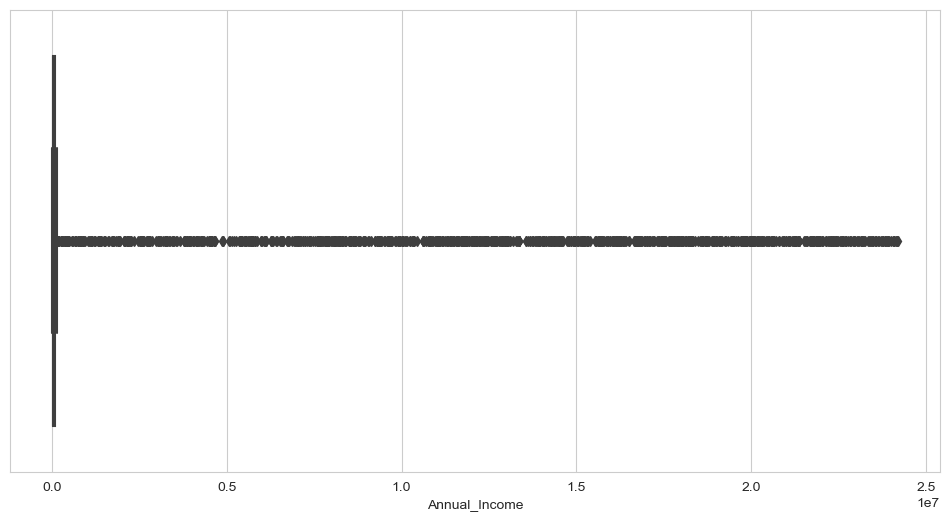

In [22]:
sns.boxplot(x = 'Annual_Income', data = df)

**15.- MONTHLY_INHAND_SALARY: AGRUPAR POR CADA CLIENTE Y COMPLETAR VACÍOS CON LA MODA DE C/U**

Este código tiene como objetivo llenar los valores faltantes (NaN) en la columna Monthly_Inhand_Salary con la moda de los salarios mensuales en mano (Monthly_Inhand_Salary) para cada Customer_ID.

In [23]:
# Agrupa el DataFrame df por la columna Customer_ID y selecciona la columna Monthly_Inhand_Salary
# Aplica la función transform para calcular la moda de Monthly_Inhand_Salary para cada grupo (Customer_ID)
# La función lambda x: x.mode().iloc[0] calcula la moda de x
# y selecciona el primer valor de la moda en caso de múltiples modas

Customer_Mode_Salary = df.groupby('Customer_ID')['Monthly_Inhand_Salary'].transform(lambda x : x.mode().iloc[0])
df['Monthly_Inhand_Salary'] = np.where(df['Monthly_Inhand_Salary'].isnull(),Customer_Mode_Salary,df['Monthly_Inhand_Salary'])


Este código genera un gráfico de distribución para visualizar cómo se distribuyen los salarios mensuales en el DataFrame df, utilizando Seaborn y Matplotlib. El gráfico también muestra la asimetría (skewness) de la distribución en la leyenda

Histograma: Muestra la frecuencia de los salarios mensuales en mano dentro de intervalos específicos.

Curva de densidad: Muestra la estimación de la densidad de probabilidad del salario mensual.

Asimetría (skewness): Indica la simetría de la distribución. Un valor cercano a 0 indica una distribución simétrica, valores positivos indican una distribución sesgada a la derecha, y valores negativos indican una distribución sesgada a la izquierda.

Text(0.5, 1.0, 'Customer Monthly Salary Distribution')

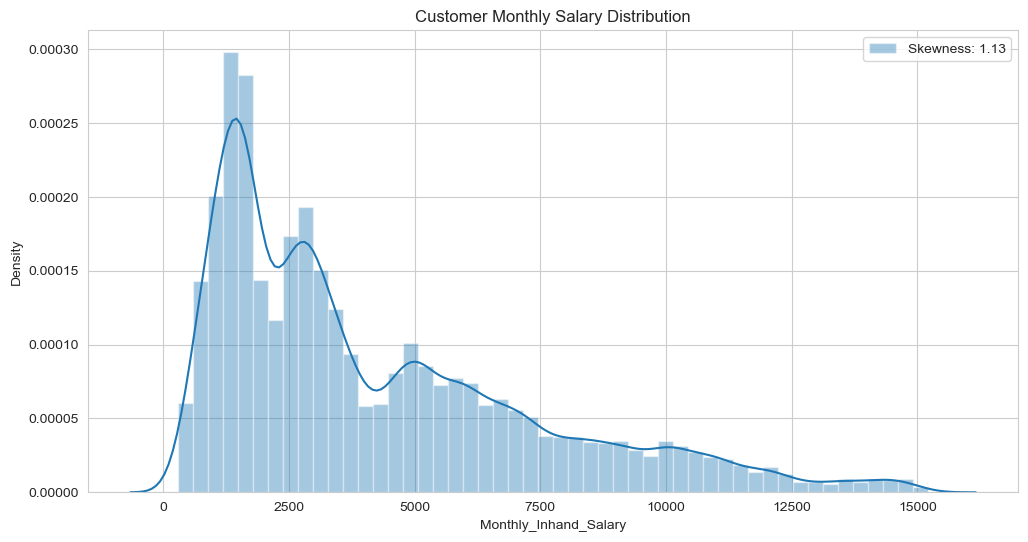

In [24]:
sns.distplot(df['Monthly_Inhand_Salary'], label = 'Skewness: %.2f'%(df['Monthly_Inhand_Salary'].skew()))
plt.legend(loc = 'best')
plt.title('Customer Monthly Salary Distribution')

**16.- OCCUPATION: LIMPIAR CARACTERES EXTRAÑOS Y REEMPLAZAR VACÍOS CON LA MODA DE LAS OCUPACIONES DE CADA CLIENTE BASADOS EN SU NÚMERO DE SEGURIDAD SOCIAL SSN**

Este código tiene como objetivo llenar los valores faltantes en la columna Occupation del DataFrame df, donde los valores faltantes se indican con '_______', usando el valor más común para cada número de seguro social (SSN). 

Limpia la columna Occupation reemplazando los valores '_______' con la moda de Occupation para cada SSN, asegurando que los valores faltantes se completen con la información más frecuente disponible.

In [25]:
def fill_occupation_by_ssn(df):
    # Replace '_______' values ​​in 'Occupation' column with NaN (empty) values
    df['Occupation'] = df['Occupation'].replace('_______', np.nan)
    
    # Find the most recurring 'Occupation' values ​​for each SNN number
    most_common_occupation_by_ssn = df.groupby('SSN')['Occupation'].apply(lambda x: x.mode().iloc[0])
    
    # 'Populating '_______' values ​​in 'Occupation' column
    for index, row in df.iterrows():
        if pd.isnull(row['Occupation']) and row['SSN'] in most_common_occupation_by_ssn:
            df.at[index, 'Occupation'] = most_common_occupation_by_ssn[row['SSN']]


fill_occupation_by_ssn(df)

In [26]:
occupation_count = df['Occupation'].value_counts()
occupation_count

Occupation
Lawyer           7489
Engineer         6837
Architect        6806
Mechanic         6752
Accountant       6717
Scientist        6713
Media_Manager    6689
Developer        6687
Teacher          6646
Entrepreneur     6621
Doctor           6537
Journalist       6502
Manager          6402
Musician         6322
Writer           6280
Name: count, dtype: int64

Este código genera un gráfico de barras que ilustra la frecuencia de cada ocupación en la columna Occupation del DataFrame df, facilitando la visualización de cómo se distribuyen las diferentes ocupaciones en los datos.

Text(0.5, 0, 'Occupation')

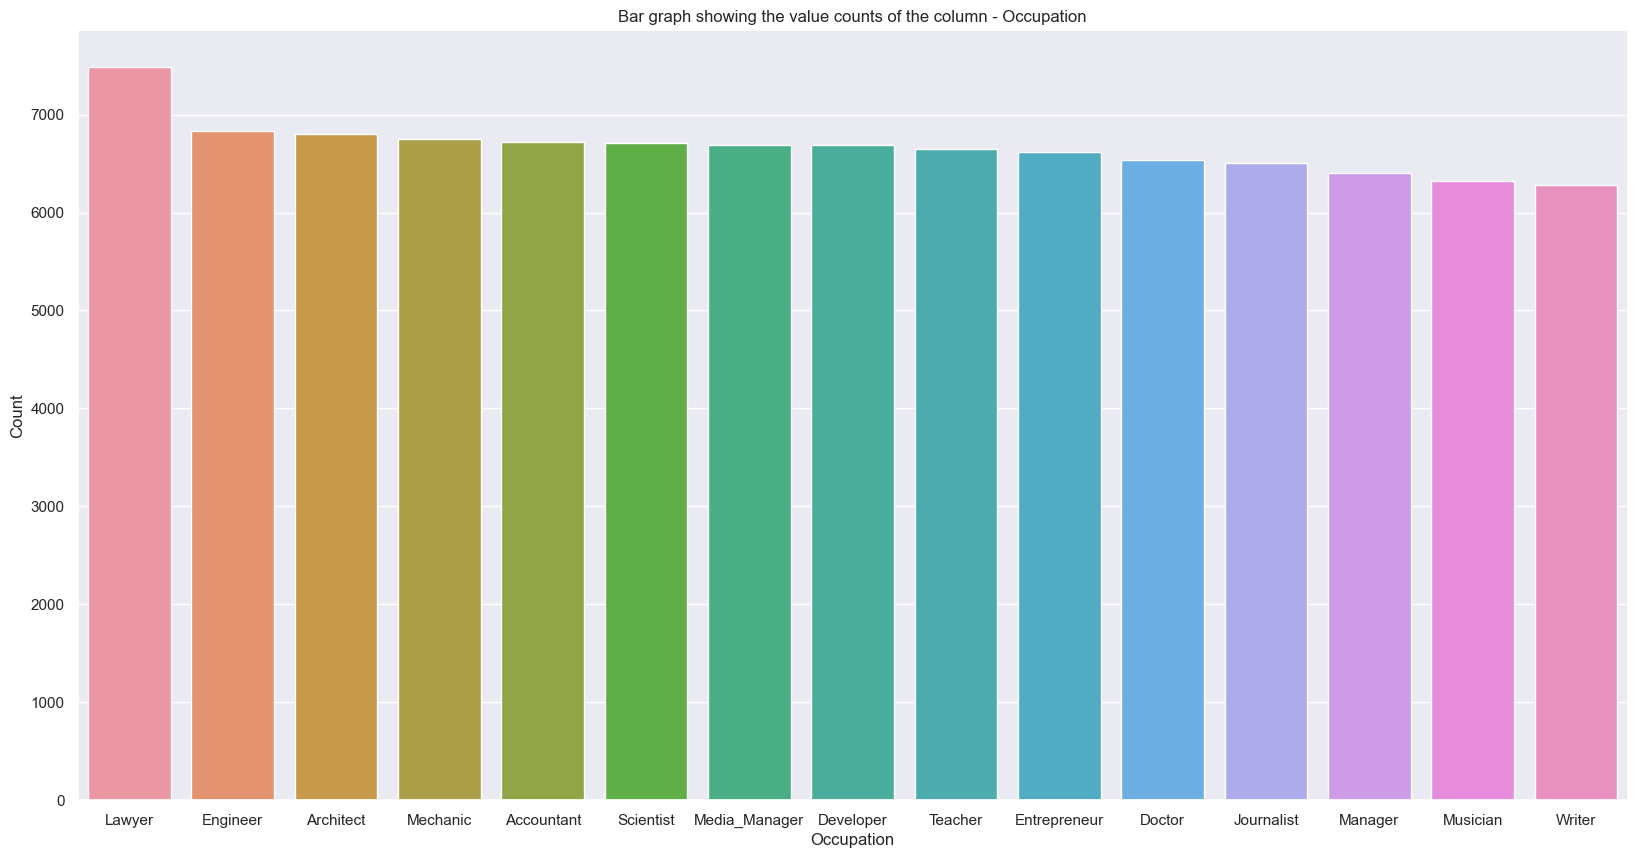

In [27]:
sns.set(rc={'figure.figsize': (20, 10)})
sns.barplot(x=occupation_count.index, y=occupation_count.values)
plt.title('Bar graph showing the value counts of the column - Occupation')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Occupation', fontsize=12)

Este código genera un gráfico de conteo para la columna Credit_Score en función de la columna Occupation, utilizando sns.catplot de Seaborn.

La visualización mostrará la distribución del puntaje de crédito (Credit_Score) para cada ocupación (Occupation), ayudando a analizar las diferencias en los puntajes de crédito entre diferentes grupos ocupacionales.

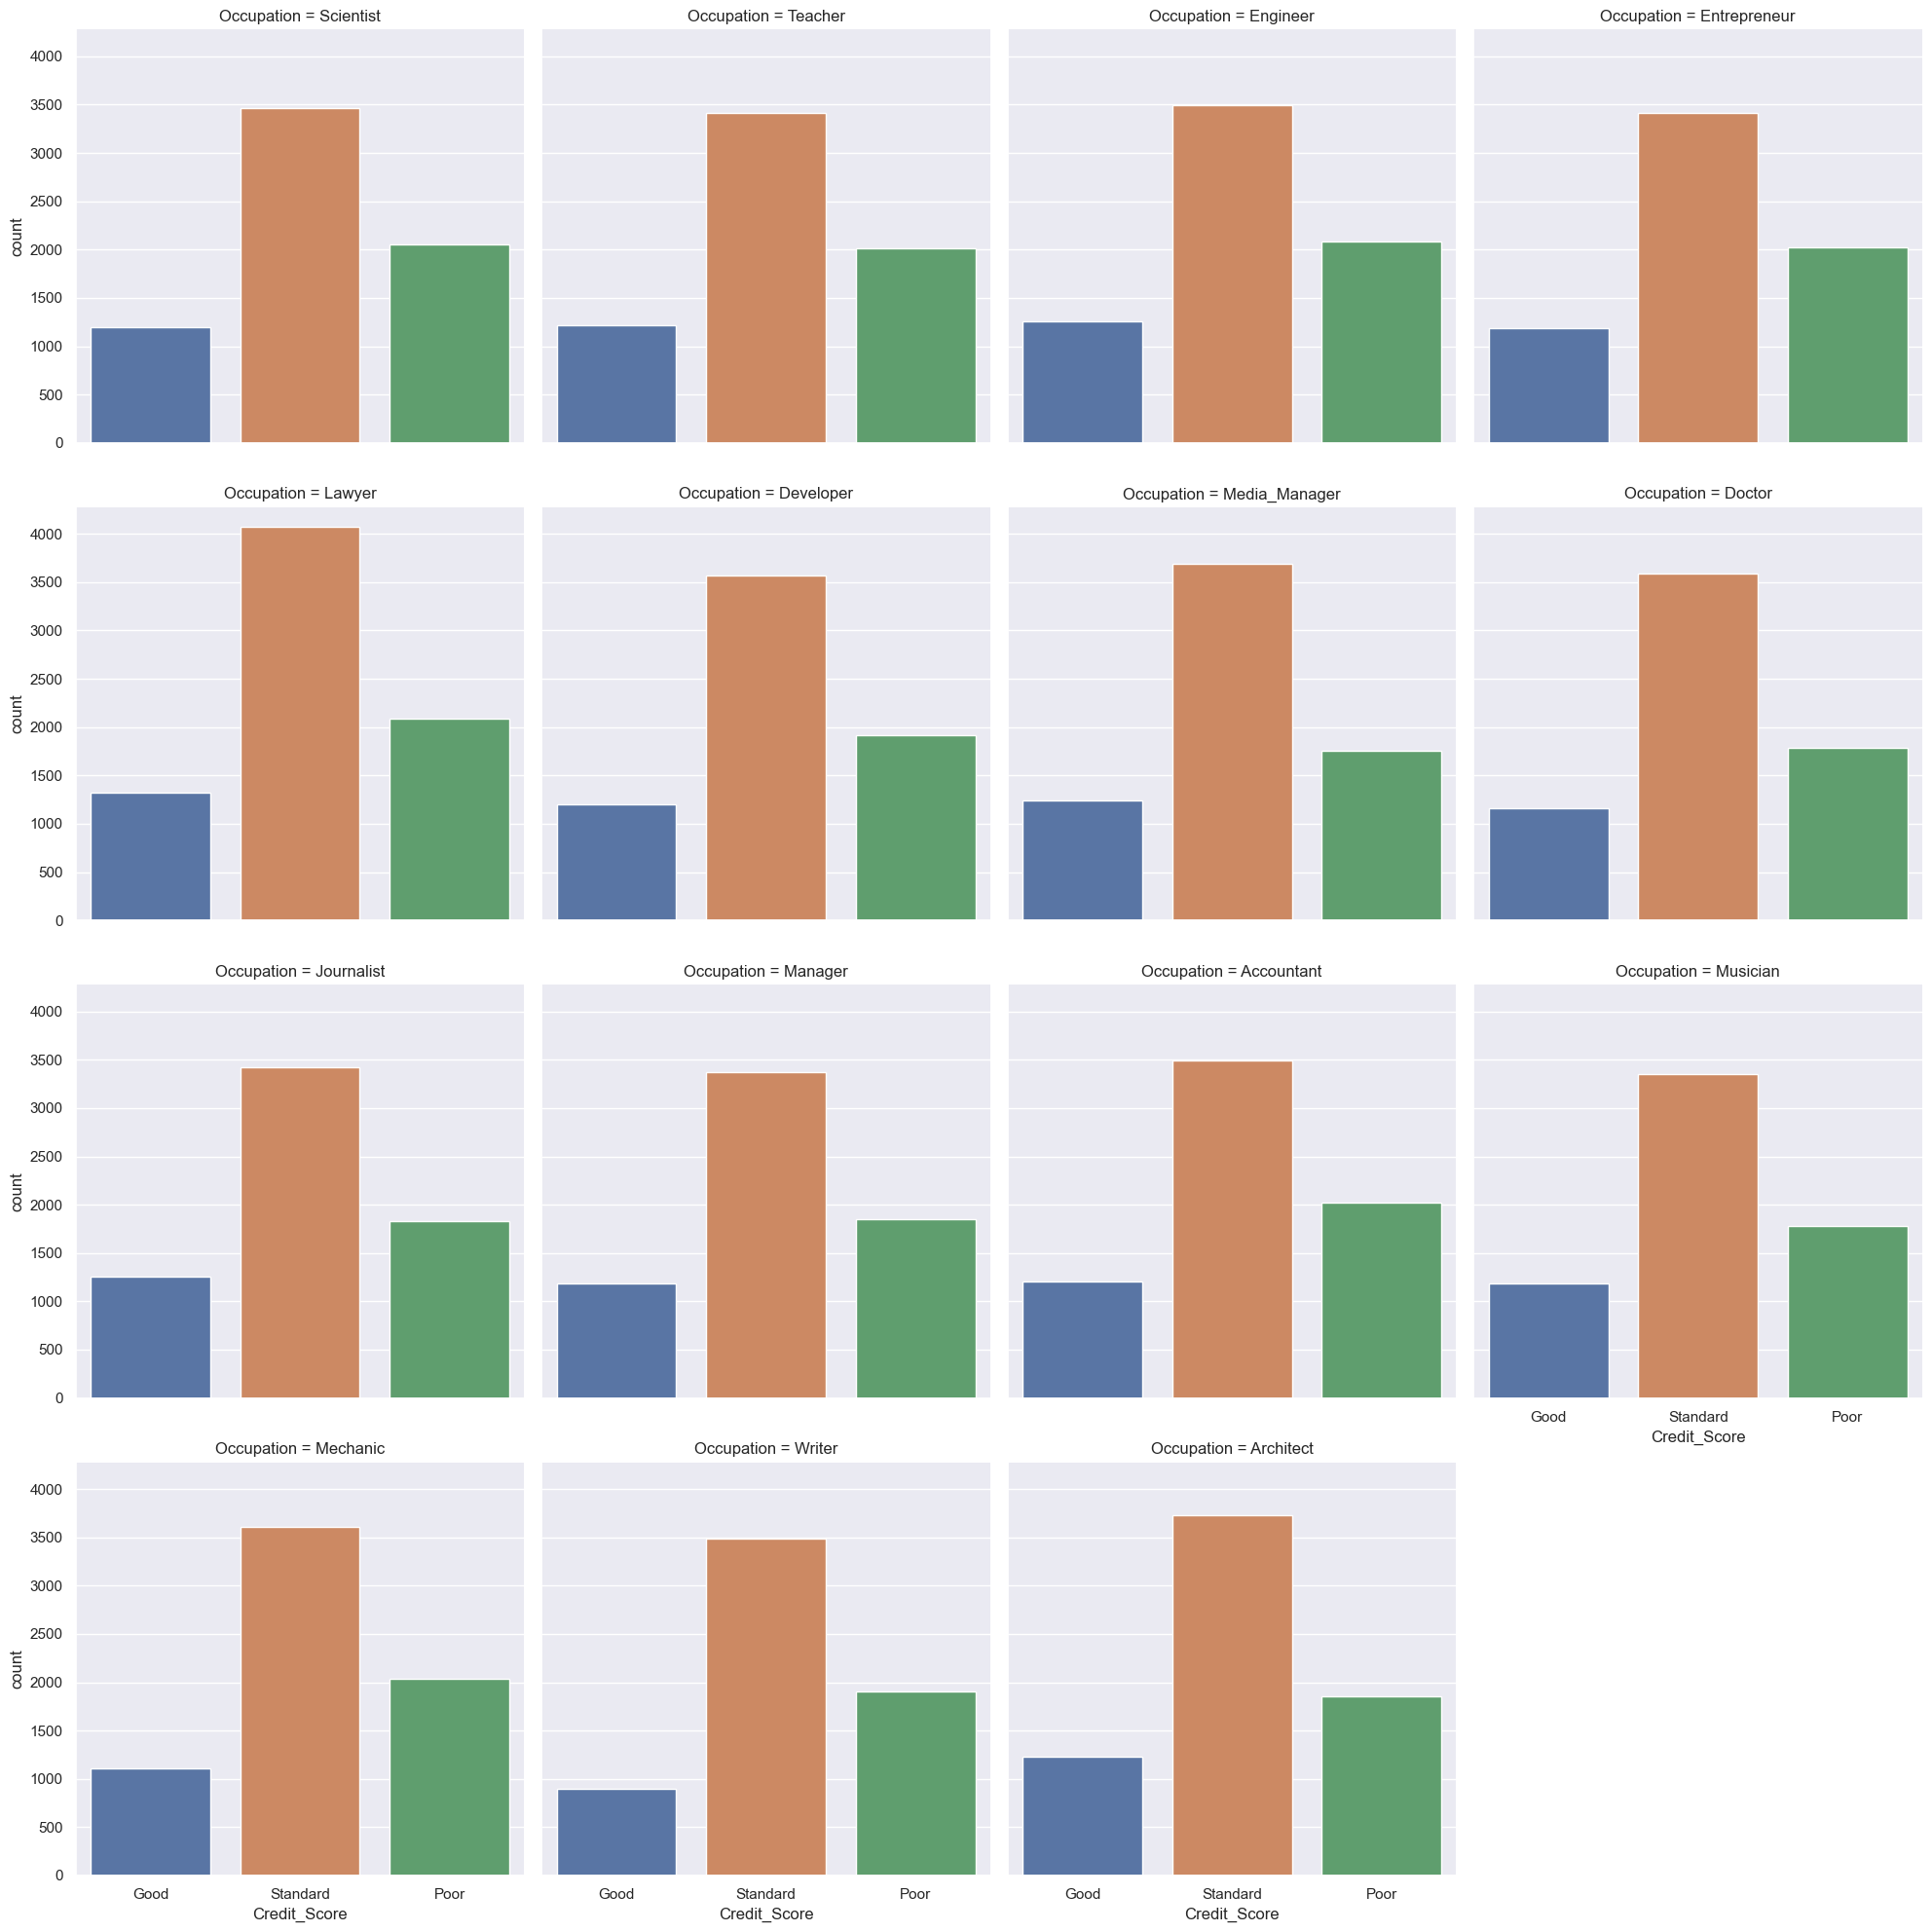

In [28]:
sns.catplot(x='Credit_Score', col='Occupation', data=df, kind='count', col_wrap=4)

**17.- NUM_OF_LOAN: LIMPIAR CARACTERES EXTRAÑOS Y REDUCIR EL NÚMERO DE CRÉDITOS A VALORES MÁS REALES**

In [29]:
df['Num_of_Loan'].unique()

array(['4', '1', '3', '967', '-100', '0', '0_', '2', '3_', '2_', '7', '5',
       '5_', '6', '8', '8_', '9', '9_', '4_', '7_', '1_', '1464', '6_',
       '622', '352', '472', '1017', '945', '146', '563', '341', '444',
       '720', '1485', '49', '737', '1106', '466', '728', '313', '843',
       '597_', '617', '119', '663', '640', '92_', '1019', '501', '1302',
       '39', '716', '848', '931', '1214', '186', '424', '1001', '1110',
       '1152', '457', '1433', '1187', '52', '1480', '1047', '1035',
       '1347_', '33', '193', '699', '329', '1451', '484', '132', '649',
       '995', '545', '684', '1135', '1094', '1204', '654', '58', '348',
       '614', '1363', '323', '1406', '1348', '430', '153', '1461', '905',
       '1312', '1424', '1154', '95', '1353', '1228', '819', '1006', '795',
       '359', '1209', '590', '696', '1185_', '1465', '911', '1181', '70',
       '816', '1369', '143', '1416', '455', '55', '1096', '1474', '420',
       '1131', '904', '89', '1259', '527', '1241', '449', 

Este código tiene como objetivo limpiar y procesar la columna Num_of_Loan en el DataFrame df. Primero, limpia los caracteres no deseados y convierte los valores específicos, luego maneja los valores faltantes.

En resumen, este código limpia la columna Num_of_Loan eliminando caracteres no deseados, convirtiendo valores específicos a NaN, y luego reemplaza los valores faltantes con el valor más común, lo que facilita el análisis y la modelización de datos.

In [30]:
# num.strip("-_"): Elimina los caracteres "-" y "_" de los extremos de la cadena num

# if num == "100": Si el valor después de eliminar los caracteres es "100"
# lo convierte en NaN. Esto es útil si "100" es un marcador de datos faltantes o erróneos.

# elif len(num) > 1: Si el valor restante tiene más de un carácter, devuelve el primer carácter
# Esto puede ser útil si los valores en Num_of_Loan deben ser simplificados a un solo dígito.

# else: Si el valor tiene un solo carácter, se devuelve tal cual.

def clean_num(num):
    num = num.strip("-_")  
    if num == "100":  
        return np.nan
    elif len(num) > 1:  
        return num[0]
    else:
        return num


df["Num_of_Loan"] = df["Num_of_Loan"].apply(clean_num)

# most_common_value = df["Num_of_Loan"].mode()[0]: Calcula la moda (valor más frecuente) de la columna Num_of_Loan 
# y selecciona el primer valor de la moda.

# df["Num_of_Loan"].fillna(most_common_value): Rellena los valores faltantes (NaN) en Num_of_Loan 
# con el valor más común calculado.
    
most_common_value = df["Num_of_Loan"].mode()[0]
df["Num_of_Loan"] = df["Num_of_Loan"].fillna(most_common_value)

In [31]:
df.Num_of_Loan.value_counts()

Num_of_Loan
3    19016
2    15076
4    14776
0    10930
1    10800
6     7839
7     7368
5     7231
9     3736
8     3228
Name: count, dtype: int64

In [32]:
df.Num_of_Loan.isnull().sum()

0

**18.- TYPE_OF_LOAN: LLENAR LOS VALORES VACÍOS CON TIPO DE CRÉDITO DESCONOCIDO Y LUEGO AGRUPAR LOS TIPOS**

In [33]:
df['Type_of_Loan'].fillna('Unknown', inplace=True)

loan_type_groups = df.groupby('Type_of_Loan').size()
print(loan_type_groups)

Type_of_Loan
Auto Loan                                                                                                                                    1152
Auto Loan, Auto Loan, Auto Loan, Auto Loan, Credit-Builder Loan, Credit-Builder Loan, Mortgage Loan, and Personal Loan                          8
Auto Loan, Auto Loan, Auto Loan, Auto Loan, Student Loan, and Student Loan                                                                      8
Auto Loan, Auto Loan, Auto Loan, Credit-Builder Loan, Payday Loan, Not Specified, Payday Loan, Student Loan, and Debt Consolidation Loan        8
Auto Loan, Auto Loan, Auto Loan, Not Specified, Debt Consolidation Loan, and Credit-Builder Loan                                                8
                                                                                                                                            ...  
Student Loan, and Not Specified                                                                                

In [34]:
df.Type_of_Loan.value_counts()

Type_of_Loan
Unknown                                                                                                                               11408
Not Specified                                                                                                                          1408
Credit-Builder Loan                                                                                                                    1280
Personal Loan                                                                                                                          1272
Debt Consolidation Loan                                                                                                                1264
                                                                                                                                      ...  
Not Specified, Mortgage Loan, Auto Loan, and Payday Loan                                                                                  8
Payday 

**19.- NUM_OF_DELAYED_PAYMENT: LLENAR LOS VALORES VACÍOS CON 0 Y LIMPIAR CARACTERES EXTRAÑOS**

In [35]:
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].fillna('0')

def remove_special_characters(value):
    if isinstance(value, str):
       
        value = value.strip('_').strip('-')
    return value

df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].apply(remove_special_characters)


**20.- CHANGED_CREDIT_LIMIT: LIMPIAR CARACTERES EXTRAÑOS, LUEGO CAMBIAR A TIPO NUMÉRICO Y COLOCAR VALOR PROMEDIO EN VACÍOS**

pd.to_numeric(): Función de pandas que convierte una serie o columna a tipo numérico (como int o float).

errors='coerce': Parámetro que especifica qué hacer con los valores que no se pueden convertir a numérico.

errors='coerce' convierte estos valores no válidos en NaN (valores faltantes).
Esto es útil para manejar datos sucios o mal formateados.

In [36]:
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].replace('-', np.nan)
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].replace('_', np.nan)


df['Changed_Credit_Limit'] = pd.to_numeric(df['Changed_Credit_Limit'], errors='coerce')


mean_value = df['Changed_Credit_Limit'].mean()


df['Changed_Credit_Limit'].fillna(mean_value, inplace=True)

**21.- NUM_CREDIT_INQUIRIES: IDENTIFICAR VALORES ÚNICOS Y REEMPLAZAR VACÍOS POR CEROS**

In [37]:
df['Num_Credit_Inquiries'].unique()

array([   4.,    2.,    3., ..., 1361.,  310.,   74.])

In [38]:
df['Num_Credit_Inquiries'].fillna(0, inplace=True)

**22.- CREDIT_MIX: LIMPIAR CARACTERES EXTRAÑOS COLOCANDO NULL, CALCULAR MODA POR GRUPO Y MODA GLOBAL PARA LUEGO REEMPLAZAR LOS VALORES NULL POR MODA GRUPAL O GLOBAL SEGÚN EL CASO NECESARIO**

In [39]:
credit_mix_count = df['Credit_Mix'].value_counts()
credit_mix_count

Credit_Mix
Standard    36479
Good        24337
_           20195
Bad         18989
Name: count, dtype: int64

Este código está diseñado para limpiar y rellenar valores faltantes en columnas categóricas del DataFrame df, específicamente para la columna Credit_Mix.

Los valores NaN en Credit_Mix se han rellenado con la moda por Customer_ID, y si aún hay NaN, se rellenan con la moda global de la columna.

En resumen, este código limpia y completa los valores faltantes en las columnas categóricas del DataFrame, asegurando que la columna Credit_Mix tenga datos completos y listos para el análisis.

In [40]:
df['Credit_Mix'] = df['Credit_Mix'].replace('_', np.nan)

def fill_na_cat(data, val):
  
    for col in data.select_dtypes(include='object').columns:
        mode_by_customer = data.groupby('Customer_ID')[col].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
        mode_global = data[col].mode()[0]
        data[col] = data[col].fillna(mode_by_customer.fillna(mode_global))
    return data

df = fill_na_cat(data=df, val="Credit_Mix")

In [41]:
credit_mix_count = df['Credit_Mix'].value_counts()
credit_mix_count

Credit_Mix
Standard    45848
Good        30384
Bad         23768
Name: count, dtype: int64

Este gráfico de barras visualiza la distribución de las categorías en la columna Credit_Mix, proporcionando una visión clara de la frecuencia de cada tipo de crédito en los datos.

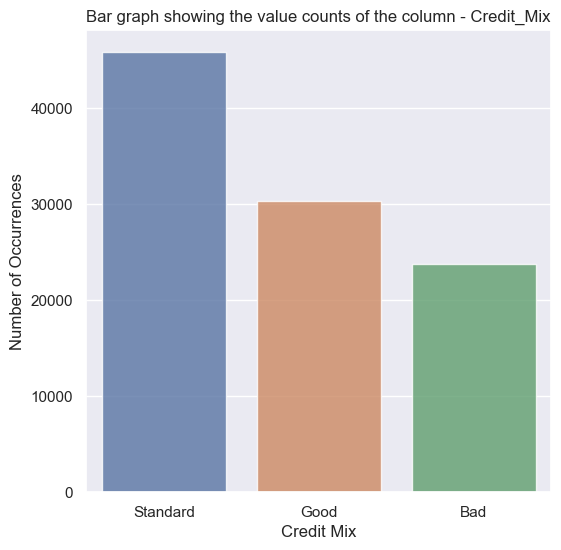

In [42]:
sns.set(rc={'figure.figsize': (6, 6)})
sns.barplot(x=credit_mix_count.index, y=credit_mix_count.values, alpha=0.8)
plt.title('Bar graph showing the value counts of the column - Credit_Mix')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Credit Mix', fontsize=12)
plt.show()

**VISUALIZAR PARA DETERMINAR SI FALTAN PROCESAR MÁS COLUMNAS:**

In [43]:
df.sample(15)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
75098,0x1ce08,CUS_0xb490,3,Tomp,38,542-78-0787,Accountant,91771.29,7547.61,5,...,Standard,1266.35,41.41,11 Years and 6 Months,Yes,176.58,69.35307779,High_spent_Large_value_payments,748.8283203,Standard
37733,0xf317,CUS_0x6664,6,Gabriel Wildaud,28,#F%$D@*&8,Developer,38334.61,2966.55,3,...,Good,1234.53,39.82,20 Years and 9 Months,NM,41.07,117.2994781,!@9#%8,446.4044786,Standard
51378,0x1430c,CUS_0x5b0d,3,Holtons,17,740-39-0372,Writer,14433.94,1113.83,9,...,Bad,3155.47,36.36,13 Years and 3 Months,Yes,81.00,66.79553045,Low_spent_Small_value_payments,253.5861902,Standard
58407,0x16c39,CUS_0x6493,8,chief Asiah,32,430-26-7042,Doctor,89154.27,7223.52,3,...,Standard,102.66,35.18,22 Years and 6 Months,Yes,146.10,__10000__,High_spent_Medium_value_payments,673.426796,Standard
13846,0x6720,CUS_0x9ab6,7,Katie Reida,25,999-17-4007,Mechanic,37909.82,3043.15,4,...,Standard,1821.39,32.79,16 Years and 1 Months,Yes,87.15,135.7671724,Low_spent_Large_value_payments,351.4015821,Poor
30868,0xcade,CUS_0x89d3,5,Noelp,28,458-82-8232,Accountant,7711.54,779.63,8,...,Bad,2929.44,24.82,2 Years and 11 Months,Yes,44.85,86.17324674,Low_spent_Small_value_payments,236.9359978,Poor
21686,0x9510,CUS_0x52bf,7,Diane Bartzn,46,331-26-0350,Manager,147334.32,12223.86,5,...,Good,1133.25,32.00,25 Years and 2 Months,No,0.00,429.8826215,Low_spent_Small_value_payments,1082.503378,Standard
20896,0x9072,CUS_0x734a,1,Alexei Oreskovicd,19,549-24-0925,Developer,36349.28,2885.11,6,...,Bad,2195.84,29.86,10 Years and 1 Months,Yes,72.66,110.5177578,!@9#%8,395.3321061,Poor
16023,0x73e1,CUS_0x6d25,8,Arnon,39,302-04-8460,Mechanic,40908.16,3273.01,0,...,Good,1210.4,27.93,17 Years and 5 Months,No,0.00,295.0757056,Low_spent_Large_value_payments,302.2256277,Standard
23146,0x9da0,CUS_0x46dd,3,John Irishl,28,537-71-3800,Engineer,44572.43,3757.37,2,...,Good,198.87,28.90,15 Years and 3 Months,No,0.00,109.7912256,High_spent_Medium_value_payments,515.945691,Good


In [44]:
df.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

**23.- CREDIT_HISTORY_AGE: UNIFICAR LOS DATOS DE AÑOS Y MESES A SOLAMENTE MESES, LUEGO ELIMINAR LA COLUMNA ORIGINAL**

Este código convierte una columna que representa la edad del historial de crédito en años y meses a una representación total en meses. La función parse_years_and_months_to_months es usada para realizar esta conversión y luego se aplica a la columna Credit_History_Age del DataFrame df.

Con esta función se logra:

- Consistencia: Facilita el análisis al tener una sola unidad de medida (meses) para la edad del historial de crédito.

- Facilita cálculos: Permite realizar cálculos y análisis adicionales de manera más sencilla al trabajar con una sola métrica.

En resumen, este código transforma las descripciones de edad en años y meses a una cifra total en meses, lo que facilita su uso en análisis y modelización de datos.

In [45]:
def parse_years_and_months_to_months(age):
    if isinstance(age, str):
        age_parts = age.split(' Years and ')
        years = int(age_parts[0]) if 'Years' in age else 0 
        months_str = age_parts[1].split(' Months')[0] if 'Months' in age_parts[1] else '0' 
        months = int(months_str)
        total_months = years * 12 + months
        return total_months
    else:
        return 0  


df['Credit_History_Age_Months'] = df['Credit_History_Age'].apply(parse_years_and_months_to_months)

In [46]:
df.drop(columns=['Credit_History_Age'], inplace=True)

In [47]:
df['Credit_History_Age_Months']

0        265
1        265
2        267
3        268
4        269
        ... 
99995    378
99996    379
99997    380
99998    381
99999    382
Name: Credit_History_Age_Months, Length: 100000, dtype: int64

**24.- AMOUNT_INVESTED_MONTHLY: ELIMINAR LOS CARACTERES EXTRAÑOS Y REEMPLAZAR CON LOS VALORES DE LA MODA DE CADA GRUPO DE CLIENTE**

In [48]:
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].replace(
    '__10000__', np.nan)

df['Amount_invested_monthly'] = df.groupby(
    'Customer_ID')['Amount_invested_monthly'].transform(
        lambda x: x.mode()[0] if not x.mode().empty else np.NaN)

In [49]:
df['Amount_invested_monthly'].isnull().sum()

0

**25.- MONTHLY_BALANCE: ELIMINAR LOS CARACTERES EXTRAÑOS, TRANSFORMAR EL TIPO DE DATOS A FLOAT Y REEMPLAZAR LOS VALORES NULOS CON LA MEDIA**

In [50]:
df['Monthly_Balance'].value_counts()

Monthly_Balance
__-333333333333333333333333333__    9
239.5962053                         6
123.0872825                         5
346.6416554                         5
192.6571217                         5
                                   ..
571.308005                          1
510.5415557                         1
658.9412372                         1
1072.867912                         1
393.6736956                         1
Name: count, Length: 98790, dtype: int64

Beneficio de las transformaciones:

- Consistencia: Asegura que los valores estén en un formato numérico limpio y consistente.

- Preparación para análisis: Facilita la conversión de la columna a tipo numérico para análisis y modelización.

En resumen, este código prepara la columna Monthly_Balance para una conversión a valores numéricos limpios al eliminar caracteres no deseados y formatear los datos adecuadamente.

In [51]:
df['Monthly_Balance'] = df['Monthly_Balance'].astype(str)

df['Monthly_Balance'] = df['Monthly_Balance'].str.replace(r'[^0-9.-]+', '').str.replace('_', '').str.replace('-', '')

Este código convierte los valores de Monthly_Balance en valores flotantes, calcula el valor medio y utiliza ese valor para rellenar los valores faltantes en la columna. Esto asegura que la columna esté lista para el análisis y modelización.

In [52]:
df['Monthly_Balance'] = df['Monthly_Balance'].astype(float)

mean_value = df['Monthly_Balance'].mean()

df['Monthly_Balance'].fillna(mean_value, inplace=True)

In [53]:
df['Monthly_Balance'].value_counts()

Monthly_Balance
333333333333333314856026112.00    9
239.60                            6
123.09                            5
346.64                            5
192.66                            5
                                 ..
571.31                            1
510.54                            1
658.94                            1
1072.87                           1
393.67                            1
Name: count, Length: 98790, dtype: int64

**26.- PAYMENT_BEHAVIOUR: ELIMINAR LOS CARACTERES EXTRAÑOS Y REEMPLAZAR LOS VALORES NULOS CON LOS VALORES NO NULOS INMEDIATOS ANTERIORES DE CADA DATO**

In [54]:
df['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: count, dtype: int64

In [55]:
df['Payment_Behaviour'] = df['Payment_Behaviour'].replace('!@9#%8', np.nan)

In [56]:
df['Payment_Behaviour'].isna().sum()

7600

In [57]:
grouped_df = df.groupby('Payment_Behaviour').size()

print(grouped_df)

Payment_Behaviour
High_spent_Large_value_payments     13721
High_spent_Medium_value_payments    17540
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
Low_spent_Medium_value_payments     13861
Low_spent_Small_value_payments      25513
dtype: int64


In [58]:
df['Payment_Behaviour'] = df['Payment_Behaviour'].fillna(method='ffill')

In [59]:
df['Payment_Behaviour'].isna().sum()

0

In [60]:
grouped_df = df.groupby('Payment_Behaviour').size()

print(grouped_df)

Payment_Behaviour
High_spent_Large_value_payments     14863
High_spent_Medium_value_payments    19010
High_spent_Small_value_payments     12250
Low_spent_Large_value_payments      11297
Low_spent_Medium_value_payments     14987
Low_spent_Small_value_payments      27593
dtype: int64


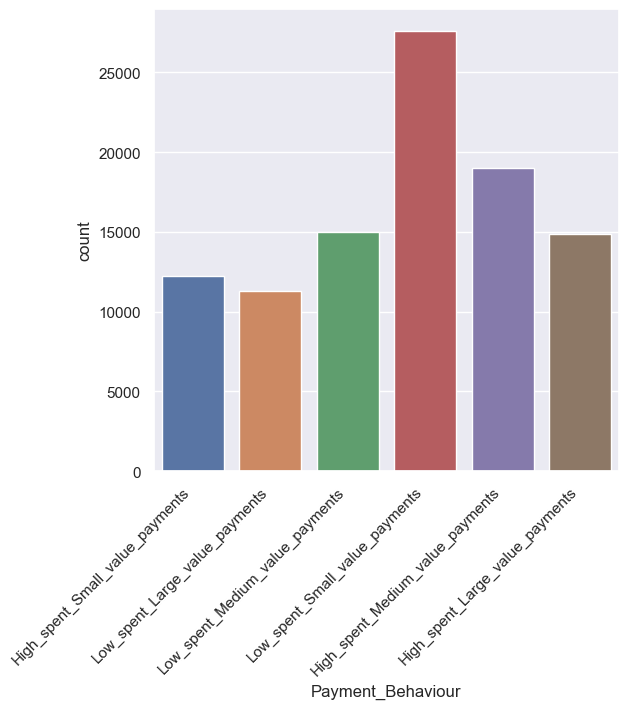

In [61]:
plot = sns.countplot(x='Payment_Behaviour', data=df)

plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')  

plt.show()

**27.- PAYMENT_OF_MIN_AMOUNT: NO SE MODIFICA NADA**

In [62]:
min_amount_count = df['Payment_of_Min_Amount'].value_counts()
min_amount_count

Payment_of_Min_Amount
Yes    52326
No     35667
NM     12007
Name: count, dtype: int64

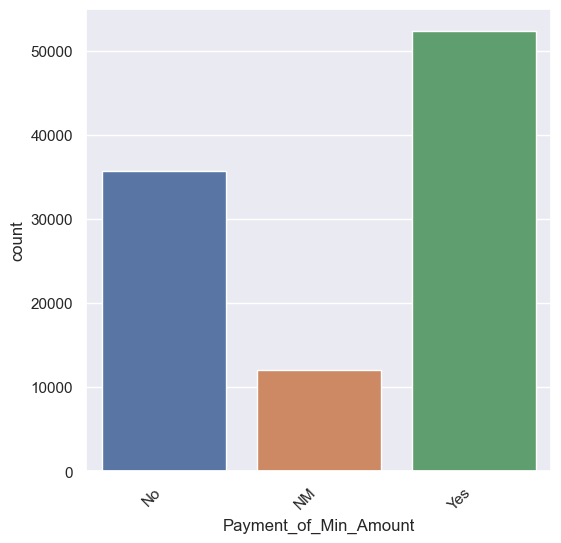

In [63]:
plot = sns.countplot(x='Payment_of_Min_Amount', data=df)

plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')

plt.show()

**28.- INTEREST_RATE: CONVERTIR DATOS A FLOAT**

In [64]:
df['Interest_Rate'] = df['Interest_Rate'].astype(float)

In [65]:
df.Interest_Rate.value_counts()

Interest_Rate
8.00       5012
5.00       4979
6.00       4721
12.00      4540
10.00      4540
           ... 
4995.00       1
1899.00       1
2120.00       1
5762.00       1
5729.00       1
Name: count, Length: 1750, dtype: int64

**29.- ELIMINAR COLUMNAS INNECESARIAS:**

In [66]:
df.drop(['ID','Customer_ID', 'Month', 'Name','SSN', 'Type_of_Loan'], axis = 1, inplace = True)

**30.- VALIDAR DATOS PERDIDOS:**

Series([], dtype: int64)


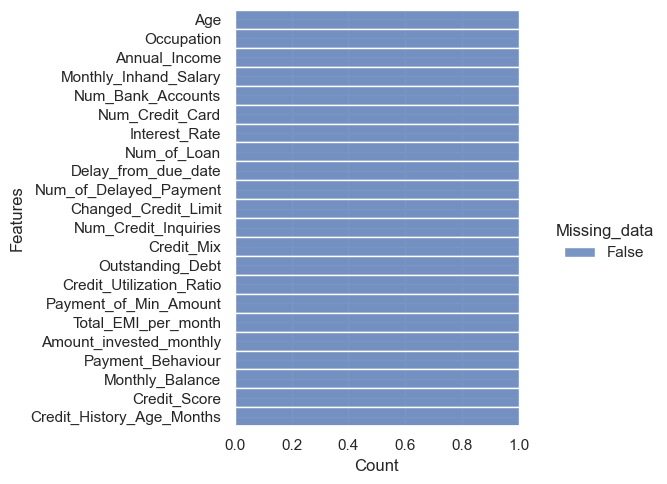

In [67]:
print(df.isna().sum()[df.isna().sum()>0])
na_ratio_plot()

**31.- VALIDAR TIPOS DE DATOS:**

In [68]:
df.dtypes 

Age                            int64
Occupation                    object
Annual_Income                float64
Monthly_Inhand_Salary        float64
Num_Bank_Accounts              int64
Num_Credit_Card                int64
Interest_Rate                float64
Num_of_Loan                   object
Delay_from_due_date            int64
Num_of_Delayed_Payment        object
Changed_Credit_Limit         float64
Num_Credit_Inquiries         float64
Credit_Mix                    object
Outstanding_Debt              object
Credit_Utilization_Ratio     float64
Payment_of_Min_Amount         object
Total_EMI_per_month          float64
Amount_invested_monthly       object
Payment_Behaviour             object
Monthly_Balance              float64
Credit_Score                  object
Credit_History_Age_Months      int64
dtype: object

**32.- CONVERTIR LOS TIPOS DE DATOS A FLOAT EN COLUMNAS SELECCIONADAS:**

In [69]:
columns_to_convert = ['Num_of_Delayed_Payment', 'Outstanding_Debt', 'Amount_invested_monthly','Num_of_Loan']
for col in columns_to_convert:
    df[col] = df[col].str.replace('_', '').astype(float)

In [70]:
df.dtypes

Age                            int64
Occupation                    object
Annual_Income                float64
Monthly_Inhand_Salary        float64
Num_Bank_Accounts              int64
Num_Credit_Card                int64
Interest_Rate                float64
Num_of_Loan                  float64
Delay_from_due_date            int64
Num_of_Delayed_Payment       float64
Changed_Credit_Limit         float64
Num_Credit_Inquiries         float64
Credit_Mix                    object
Outstanding_Debt             float64
Credit_Utilization_Ratio     float64
Payment_of_Min_Amount         object
Total_EMI_per_month          float64
Amount_invested_monthly      float64
Payment_Behaviour             object
Monthly_Balance              float64
Credit_Score                  object
Credit_History_Age_Months      int64
dtype: object

**VISUALIZAR ESTADÍSTICOS DE COLUMNAS NUMÉRICAS:**

In [71]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,100000.00,33.26,11.56,1.00,24.00,33.00,42.00,99.00
Annual_Income,100000.00,176415.70,1429618.05,7005.93,19457.50,37578.61,72790.92,24198062.00
Monthly_Inhand_Salary,100000.00,4198.35,3187.40,303.65,1626.76,3095.98,5961.64,15204.63
Num_Bank_Accounts,100000.00,17.09,117.40,-1.00,3.00,6.00,7.00,1798.00
Num_Credit_Card,100000.00,22.47,129.06,0.00,4.00,5.00,7.00,1499.00
Interest_Rate,100000.00,72.47,466.42,1.00,8.00,13.00,20.00,5797.00
Num_of_Loan,100000.00,3.51,2.40,0.00,2.00,3.00,5.00,9.00
Delay_from_due_date,100000.00,21.07,14.86,-5.00,10.00,18.00,28.00,67.00
Num_of_Delayed_Payment,100000.00,28.78,218.11,0.00,8.00,13.00,18.00,4397.00
Changed_Credit_Limit,100000.00,10.39,6.72,-6.49,5.42,9.56,14.66,36.97


**33.- MOSTRAR RELACIÓN ENTRE LAS COLUMNAS NUMÉRICAS Y LA COLUMNA CREDIT_SCORE:**

Este código realiza un análisis visual de las distribuciones de las columnas numéricas en relación con la columna Credit_Score del DataFrame df. Utiliza gráficos de caja (boxplots) para mostrar la dispersión y la distribución de los valores numéricos para cada nivel de Credit_Score. 

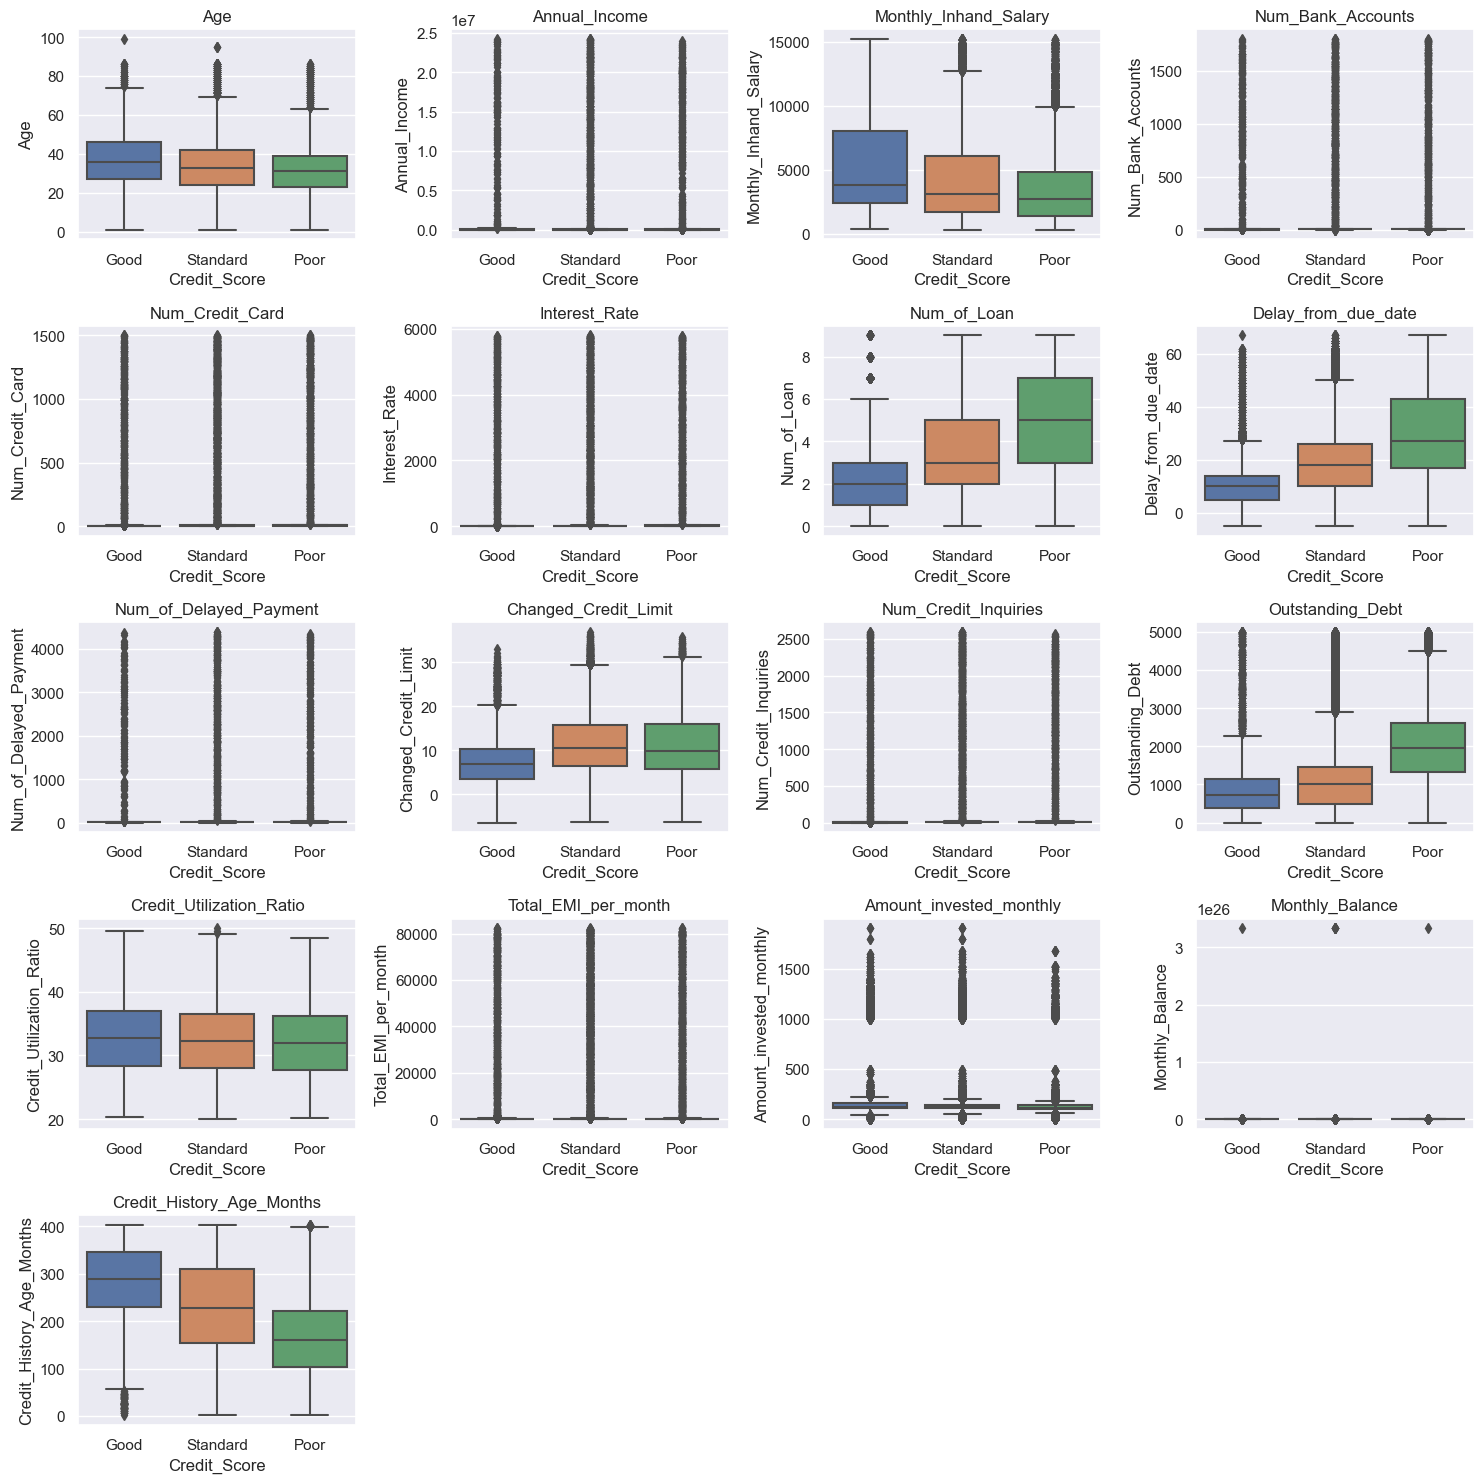

In [72]:
df_numeric_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]

plt.figure(figsize=(15,15))
for i, col in enumerate(df_numeric_cols):
    plt.subplot(5, 4, i+1)
    sns.boxplot(x='Credit_Score', y=col, data=df)
    plt.title(col)
plt.tight_layout()
plt.show()

**34.- VALIDAR Y ELIMINAR DATOS ATÍPICOS:**

Este código tiene como objetivo identificar y eliminar los valores atípicos de las columnas numéricas del DataFrame df para cada grupo de Credit_Score. Los valores atípicos se definen como aquellos que están a más de cuatro desviaciones estándar de la media.

Beneficio de elliminar datos atípicos:

- Limpieza de datos: Eliminar los valores atípicos puede mejorar la calidad de los datos y hacer que los análisis y modelos sean más precisos.

- Reducción de sesgo: Los valores atípicos extremos pueden sesgar los resultados del análisis estadístico y los modelos predictivos.

En resumen, este código identifica y elimina los valores atípicos en las columnas numéricas del DataFrame df para cada grupo de Credit_Score, ayudando a limpiar y preparar los datos para análisis y modelización.

In [73]:
df_num = df.select_dtypes(include='number')
for column in df_num.columns:
    for i in df["Credit_Score"].unique():
        selected_i = df[df["Credit_Score"] == i]
        selected_column = selected_i[column]
        
        std = selected_column.std()
        mean= selected_column.mean()

# Estas líneas definen los límites superior (max) e inferior (min) para determinar qué valores se considerarán atípicos.
        max = mean + (4 * std)
        min =  mean - (4 * std)
        
        outliers = selected_column[((selected_i[column] > max) | (selected_i[column] < min))].index
        df.drop(index=outliers, inplace=True)
        print(column, i, outliers)
        

Age Good Index([6005, 10438, 23704, 28718, 31217, 34967, 61535, 84261], dtype='int64')
Age Standard Index([ 1654,  5055,  8549,  8788, 10431, 11190, 13372, 14671, 15641, 17916,
       18578, 21195, 21800, 23121, 24634, 25095, 29174, 33864, 34517, 35557,
       36575, 37904, 38248, 40478, 40483, 43149, 45669, 45931, 46755, 48897,
       50233, 52065, 53434, 55609, 56864, 57307, 57513, 59143, 60190, 60625,
       61040, 61509, 63018, 63815, 63983, 64001, 64179, 64436, 65223, 65420,
       66068, 66153, 67401, 67579, 68122, 68166, 68946, 71215, 71542, 71732,
       72205, 72375, 74040, 75531, 77053, 78564, 81562, 81593, 82335, 84621,
       85741, 86769, 87236, 87755, 89933, 94475, 94945, 95620, 96689, 99512,
       99776],
      dtype='int64')
Age Poor Index([   56,  2102,  2902,  4520,  4777,  6532,  6684,  8726,  9532,  9707,
       10247, 10858, 11527, 12940, 14747, 17467, 17547, 18362, 18585, 19783,
       21069, 21498, 21502, 22277, 22612, 24730, 25769, 26550, 30084, 31459,
       3

**MOSTRAR RELACIÓN ENTRE LAS COLUMNAS NUMÉRICAS Y LA COLUMNA CREDIT_SCORE LUEGO DE ELIMINAR VALORES ATÍPICOS:**

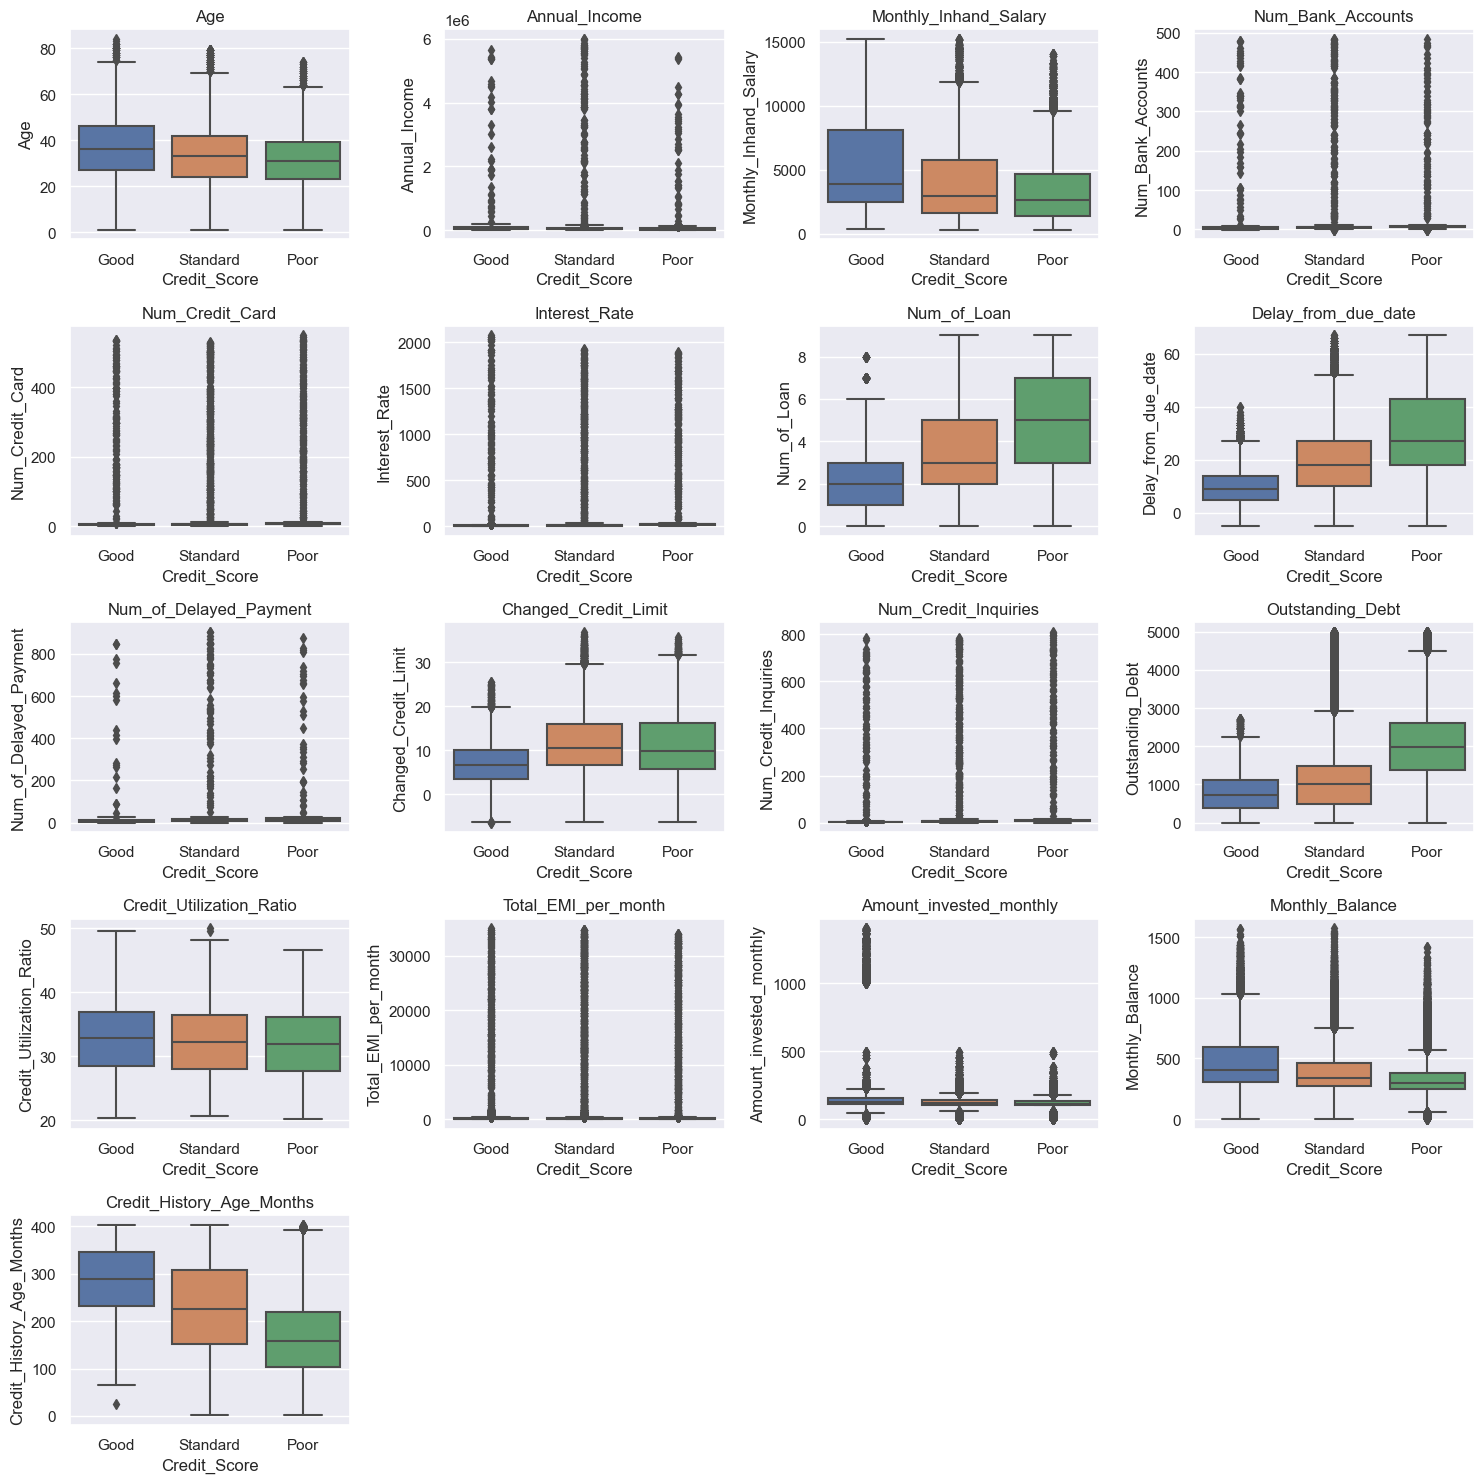

In [74]:
df_numeric_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]

plt.figure(figsize=(15,15))
for i, col in enumerate(df_numeric_cols):
    plt.subplot(5, 4, i+1)
    sns.boxplot(x='Credit_Score', y=col, data=df)
    plt.title(col)
plt.tight_layout()
plt.show()

In [75]:
df.shape

(88949, 22)

In [76]:
df.Credit_Score.value_counts()

Credit_Score
Standard    46822
Poor        26077
Good        16050
Name: count, dtype: int64

**DISTRIBUCIÓN DE VARIABLE OBJETIVO CREDIT_SCORE:**

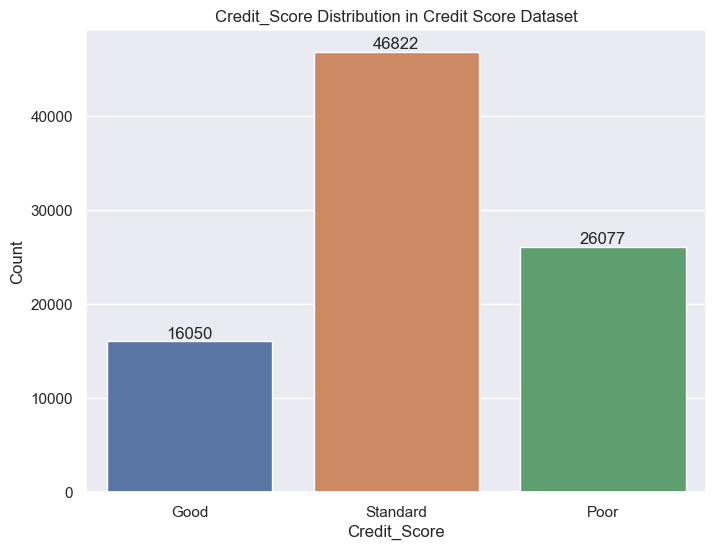

In [77]:
plt.figure(figsize=(8, 6))
ax=sns.countplot(data=df, x='Credit_Score')
ax.bar_label(ax.containers[0])
plt.title('Credit_Score Distribution in Credit Score Dataset')
plt.xlabel('Credit_Score')
plt.ylabel('Count')
plt.show()

**35.- CALCULAR MATRIZ DE CORRELACIÓN DE VARIABLES NUMÉRICAS**

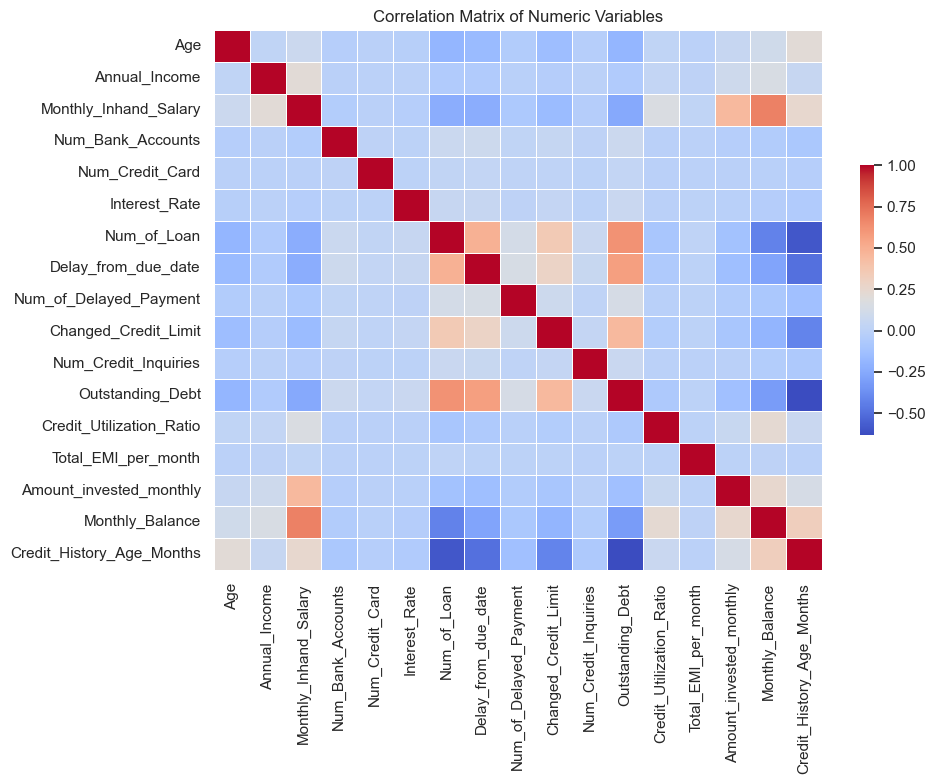

In [78]:
# SE PRESENTA UNA VISTA PRELIMINAR DE LA MATRIZ DE CORRELACIÓN DE VARIABLES NUMÉRICAS
# NO SE VISUALIZA TODAVÍA LA VARIABLE OBJETIVO PORQUE TODAVÍA NO ES NUMÉRICA
# LUEGO DE TRANSFORMARLA CON LABEL ENCODER SE EJECUTARÁ POSTERIORMENTE UNA NUEVA MATRIZ DE CORRELACIÓN

numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=False, cmap="coolwarm", fmt=".2f", linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix of Numeric Variables')
plt.tight_layout()
plt.show()

**MATRIZ DE CORRELACIÓN EN VISTA DE TABLA:**

In [79]:
numeric_df = df.select_dtypes(include=['number'])

matriz_correlacion = numeric_df.corr(numeric_only = True)
matriz_correlacion

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_History_Age_Months
Age,1.00,0.02,0.08,-0.03,-0.01,-0.02,-0.19,-0.16,-0.05,-0.14,-0.03,-0.19,0.02,-0.00,0.06,0.11,0.22
Annual_Income,0.02,1.00,0.21,-0.01,-0.00,-0.00,-0.05,-0.05,-0.01,-0.04,-0.00,-0.06,0.03,0.01,0.10,0.15,0.06
Monthly_Inhand_Salary,0.08,0.21,1.00,-0.04,-0.01,-0.03,-0.23,-0.23,-0.07,-0.16,-0.03,-0.25,0.16,0.02,0.45,0.68,0.25
Num_Bank_Accounts,-0.03,-0.01,-0.04,1.00,0.01,0.01,0.07,0.08,0.02,0.05,0.01,0.08,-0.01,-0.00,-0.03,-0.05,-0.08
Num_Credit_Card,-0.01,-0.00,-0.01,0.01,1.00,0.00,0.03,0.04,0.01,0.01,0.00,0.04,-0.01,-0.00,-0.01,-0.02,-0.03
Interest_Rate,-0.02,-0.00,-0.03,0.01,0.00,1.00,0.05,0.06,0.01,0.04,0.01,0.07,-0.01,0.00,-0.02,-0.03,-0.06
Num_of_Loan,-0.19,-0.05,-0.23,0.07,0.03,0.05,1.00,0.49,0.12,0.35,0.06,0.62,-0.09,0.02,-0.12,-0.43,-0.59
Delay_from_due_date,-0.16,-0.05,-0.23,0.08,0.04,0.06,0.49,1.00,0.15,0.28,0.06,0.57,-0.06,0.00,-0.14,-0.28,-0.49
Num_of_Delayed_Payment,-0.05,-0.01,-0.07,0.02,0.01,0.01,0.12,0.15,1.00,0.09,0.01,0.14,-0.01,0.00,-0.05,-0.08,-0.13
Changed_Credit_Limit,-0.14,-0.04,-0.16,0.05,0.01,0.04,0.35,0.28,0.09,1.00,0.04,0.45,-0.04,0.00,-0.10,-0.20,-0.42


**36.- GUARDAR Y LEER DATOS LIMPIOS**

In [80]:
df.to_csv("CreditScoreTrain_DatosLimpios.csv", index=False)

In [81]:
df = pd.read_csv('CreditScoreTrain_DatosLimpios.csv')

df.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Months
0,23,Scientist,19114.12,1824.84,3,4,3.00,4.00,3,7.00,...,Good,809.98,26.82,No,49.57,118.28,High_spent_Small_value_payments,312.49,Good,265
1,23,Scientist,19114.12,1824.84,3,4,3.00,4.00,-1,0.00,...,Good,809.98,31.94,No,49.57,118.28,Low_spent_Large_value_payments,284.63,Good,265
2,5,Scientist,19114.12,1824.84,3,4,3.00,4.00,3,7.00,...,Good,809.98,28.61,No,49.57,118.28,Low_spent_Medium_value_payments,331.21,Good,267
3,23,Scientist,19114.12,1824.84,3,4,3.00,4.00,5,4.00,...,Good,809.98,31.38,No,49.57,118.28,Low_spent_Small_value_payments,223.45,Good,268
4,23,Scientist,19114.12,1824.84,3,4,3.00,4.00,6,0.00,...,Good,809.98,24.80,No,49.57,118.28,High_spent_Medium_value_payments,341.49,Good,269


In [82]:
df.isnull().sum()

Age                          0
Occupation                   0
Annual_Income                0
Monthly_Inhand_Salary        0
Num_Bank_Accounts            0
Num_Credit_Card              0
Interest_Rate                0
Num_of_Loan                  0
Delay_from_due_date          0
Num_of_Delayed_Payment       0
Changed_Credit_Limit         0
Num_Credit_Inquiries         0
Credit_Mix                   0
Outstanding_Debt             0
Credit_Utilization_Ratio     0
Payment_of_Min_Amount        0
Total_EMI_per_month          0
Amount_invested_monthly      0
Payment_Behaviour            0
Monthly_Balance              0
Credit_Score                 0
Credit_History_Age_Months    0
dtype: int64

In [83]:
df.shape

(88949, 22)

**37.- LABEL ENCODING PARA LA COLUMNA OBJETIVO "CREDIT_SCORE" 0:GOOD 1:POOR 2:STANDARD**

In [84]:
df["Credit_Score"] = LabelEncoder().fit_transform(df["Credit_Score"])
df["Credit_Score"]

0        0
1        0
2        0
3        0
4        0
        ..
88944    1
88945    1
88946    1
88947    2
88948    1
Name: Credit_Score, Length: 88949, dtype: int32

In [85]:
#  0:GOOD 1:POOR 2:STANDARD
df["Credit_Score"].value_counts()

Credit_Score
2    46822
1    26077
0    16050
Name: count, dtype: int64

**VISUALIZAR DISTRIBUCIÓN DE LA VARIABLE OBJETIVO:**

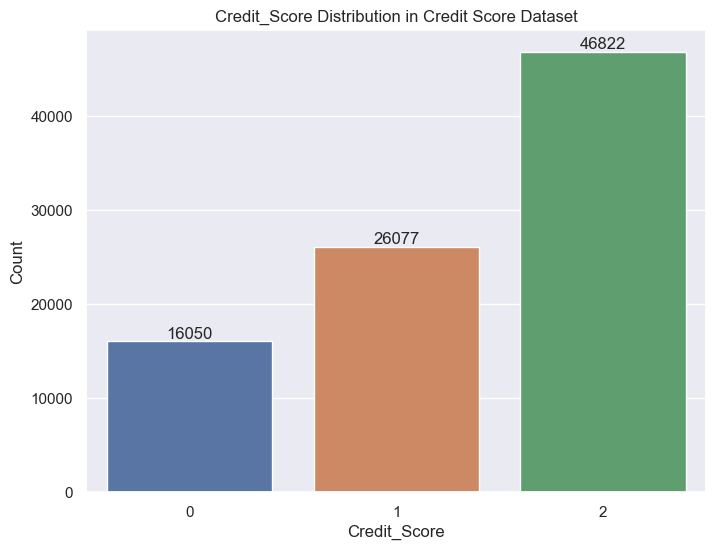

In [86]:
# 0:GOOD 1:POOR 2:STANDARD

plt.figure(figsize=(8, 6))
ax=sns.countplot(data=df, x='Credit_Score')
ax.bar_label(ax.containers[0])
plt.title('Credit_Score Distribution in Credit Score Dataset')
plt.xlabel('Credit_Score')
plt.ylabel('Count')
plt.show()

**38.- CORRELACIÓN DE VARIABLES NUMÉRICAS INCLUÍDA LA VARIABLE OBJETIVO CREDIT_SCORE**

Este código calcula y visualiza la correlación de las columnas numéricas con la columna Credit_Score en el DataFrame df.

Utiliza un gráfico de barras horizontales para mostrar las correlaciones con los siguientes beneficios:

- Identificar relaciones: Ayuda a identificar qué características numéricas están más estrechamente relacionadas con Credit_Score.

- Selección de características: Las características con alta correlación (positiva o negativa) pueden ser más relevantes para análisis adicionales o modelos predictivos.

- Visualización clara: Proporciona una representación visual clara y concisa de la fuerza y la dirección de las relaciones entre las características numéricas y Credit_Score.

En resumen, este código calcula y visualiza las correlaciones entre las características numéricas y Credit_Score, proporcionando una representación visual clara de estas relaciones que puede ser útil para el análisis y la modelización de datos.

Explicación del resultado:

Gráfico de barras horizontales: Cada barra representa la correlación de una característica numérica con Credit_Score. La longitud de la barra indica la magnitud de la correlación.

Correlación positiva/negativa: Las barras hacia la derecha (valores positivos) indican una correlación positiva, mientras que las barras hacia la izquierda (valores negativos) indican una correlación negativa.

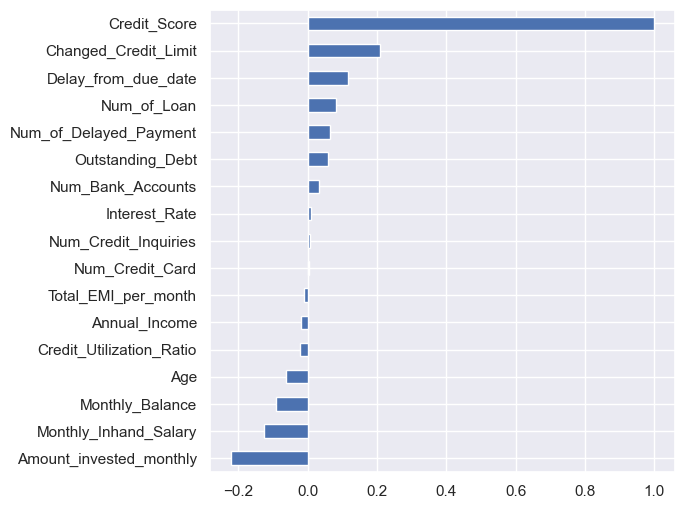

In [87]:
numerical_df = df.select_dtypes(include=[np.number])
correlation_series = numerical_df.corr()['Credit_Score'][:-1].sort_values()
correlation_series.plot.barh();

**39.- LABEL ENCODING PARA EL RESTO DE COLUMNAS CATEGÓRICAS**

In [88]:
df.select_dtypes(include=['object']).columns

Index(['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour'],
      dtype='object')

**COLUMNA PAYMENT_BEHAVIOUR:**

Este código convierte la columna Payment_Behaviour del DataFrame df en valores numéricos utilizando la codificación ordinal (Ordinal Encoding). La columna original contiene categorías que representan diferentes comportamientos de pago, y la codificación ordinal asigna un número entero a cada categoría en función de un orden específico.

- Preparación de datos para el modelado: Los modelos de machine learning a menudo requieren que las características sean numéricas. La codificación ordinal convierte las categorías en valores numéricos manteniendo el orden inherente de las categorías.

- Mantener el orden: En algunos casos, las categorías tienen un orden natural (por ejemplo, de bajo a alto), y la codificación ordinal conserva esta relación de orden.

En resumen, este código transforma la columna Payment_Behaviour en valores numéricos utilizando la codificación ordinal, manteniendo el orden de las categorías, lo que es útil para preparar los datos para el análisis y la modelización.

In [89]:
payment_behaviour_categories = ['Low_spent_Small_value_payments',
                                'Low_spent_Medium_value_payments',
                                'Low_spent_Large_value_payments',
                                'High_spent_Small_value_payments',
                                'High_spent_Medium_value_payments',
                                'High_spent_Large_value_payments']

payment_behaviour_encoder = OrdinalEncoder(categories=[payment_behaviour_categories])

df['Payment_Behaviour'] = payment_behaviour_encoder.fit_transform(df[['Payment_Behaviour']])

In [90]:
df['Payment_Behaviour']

0       3.00
1       2.00
2       1.00
3       0.00
4       4.00
        ... 
88944   4.00
88945   5.00
88946   4.00
88947   2.00
88948   2.00
Name: Payment_Behaviour, Length: 88949, dtype: float64

**COLUMNA CREDIT_MIX:**

Este código utiliza OrdinalEncoder para transformar la columna Credit_Mix del DataFrame df en valores numéricos.

- Preparación de datos para el modelado: Los modelos de machine learning a menudo requieren que las características sean numéricas. La codificación ordinal convierte las categorías en valores numéricos.

- Manejo de datos categóricos: La codificación ordinal es una forma de manejar datos categóricos cuando no se necesita una relación de orden específica entre las categorías, o cuando dicha relación es implícita en los datos.

En resumen, este código transforma la columna Credit_Mix en valores numéricos utilizando la codificación ordinal, lo que es útil para preparar los datos para el análisis y la modelización.

In [91]:
label_encoder = OrdinalEncoder()
df['Credit_Mix'] = label_encoder.fit_transform(df[['Credit_Mix']])

In [92]:
df['Credit_Mix']

0       1.00
1       1.00
2       1.00
3       1.00
4       1.00
        ... 
88944   1.00
88945   1.00
88946   1.00
88947   1.00
88948   1.00
Name: Credit_Mix, Length: 88949, dtype: float64

**COLUMNA PAYMENT_OF_MIN_AMOUNT:**

Este código utiliza LabelEncoder para transformar la columna Payment_of_Min_Amount del DataFrame df en valores numéricos. LabelEncoder convierte las etiquetas categóricas en números enteros, asignando un número único a cada categoría.

- Preparación de datos para el modelado: Los modelos de machine learning a menudo requieren que las características sean numéricas. LabelEncoder convierte las categorías en valores numéricos de manera eficiente.

- Manejo de datos categóricos: La codificación de etiquetas es útil para convertir datos categóricos en números cuando no se necesita mantener una relación de orden específica entre las categorías.

En resumen, este código transforma la columna Payment_of_Min_Amount en valores numéricos utilizando LabelEncoder, lo que es útil para preparar los datos para el análisis y la modelización.

In [93]:
label_encoder = LabelEncoder()
df['Payment_of_Min_Amount'] = label_encoder.fit_transform(df['Payment_of_Min_Amount'])

In [94]:
df['Payment_of_Min_Amount']

0        1
1        1
2        1
3        1
4        1
        ..
88944    1
88945    1
88946    1
88947    1
88948    1
Name: Payment_of_Min_Amount, Length: 88949, dtype: int32

**COLUMNA OCCUPATION:**

Este código utiliza LabelEncoder para transformar la columna Occupation del DataFrame df en valores numéricos. LabelEncoder convierte las etiquetas categóricas en números enteros, asignando un número único a cada categoría. 

- Preparación de datos para el modelado: Los modelos de machine learning a menudo requieren que las características sean numéricas. LabelEncoder convierte las categorías en valores numéricos de manera eficiente.

- Manejo de datos categóricos: La codificación de etiquetas es útil para convertir datos categóricos en números cuando no se necesita mantener una relación de orden específica entre las categorías.

En resumen, este código transforma la columna Occupation en valores numéricos utilizando LabelEncoder, lo que es útil para preparar los datos para el análisis y la modelización.

In [95]:
label_encoder = LabelEncoder()
df['Occupation'] = label_encoder.fit_transform(df['Occupation'])

In [96]:
df['Occupation']

0        12
1        12
2        12
3        12
4        12
         ..
88944     9
88945     9
88946     9
88947     9
88948     9
Name: Occupation, Length: 88949, dtype: int32

In [97]:
df.shape

(88949, 22)

**VISUALIZAR LAS 22 COLUMNAS FINALES INCLUÍDA COLUMNA OBJETIVO:**

In [98]:
df.head().T

,0,1,2,3,4
Age,23.00,23.00,5.00,23.00,23.00
Occupation,12.00,12.00,12.00,12.00,12.00
Annual_Income,19114.12,19114.12,19114.12,19114.12,19114.12
Monthly_Inhand_Salary,1824.84,1824.84,1824.84,1824.84,1824.84
Num_Bank_Accounts,3.00,3.00,3.00,3.00,3.00
Num_Credit_Card,4.00,4.00,4.00,4.00,4.00
Interest_Rate,3.00,3.00,3.00,3.00,3.00
Num_of_Loan,4.00,4.00,4.00,4.00,4.00
Delay_from_due_date,3.00,-1.00,3.00,5.00,6.00
Num_of_Delayed_Payment,7.00,0.00,7.00,4.00,0.00


**MATRIZ DE CORRELACIÓN DE TODAS LAS VARIABLES NUMÉRICAS LUEGO DE LABEL ENCODER INCLUIDA VARIABLE OBJETIVO CREDIT_SCORE:**

In [99]:
# EN VISTA DE TABLA
numeric_data = df.select_dtypes(include=['number'])

matriz_corr = numeric_data.corr(numeric_only = True)
matriz_corr

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Months
Age,1.00,-0.01,0.02,0.08,-0.03,-0.01,-0.02,-0.19,-0.16,-0.05,...,0.07,-0.19,0.02,-0.15,-0.00,0.06,0.03,0.11,-0.06,0.22
Occupation,-0.01,1.00,-0.01,-0.00,-0.00,-0.00,0.00,-0.00,0.01,-0.00,...,0.01,0.01,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.01,-0.01
Annual_Income,0.02,-0.01,1.00,0.21,-0.01,-0.00,-0.00,-0.05,-0.05,-0.01,...,0.02,-0.06,0.03,-0.04,0.01,0.10,0.07,0.15,-0.02,0.06
Monthly_Inhand_Salary,0.08,-0.00,0.21,1.00,-0.04,-0.01,-0.03,-0.23,-0.23,-0.07,...,0.09,-0.25,0.16,-0.18,0.02,0.45,0.31,0.68,-0.12,0.25
Num_Bank_Accounts,-0.03,-0.00,-0.01,-0.04,1.00,0.01,0.01,0.07,0.08,0.02,...,-0.03,0.08,-0.01,0.05,-0.00,-0.03,-0.02,-0.05,0.03,-0.08
Num_Credit_Card,-0.01,-0.00,-0.00,-0.01,0.01,1.00,0.00,0.03,0.04,0.01,...,-0.02,0.04,-0.01,0.02,-0.00,-0.01,-0.01,-0.02,0.01,-0.03
Interest_Rate,-0.02,0.00,-0.00,-0.03,0.01,0.00,1.00,0.05,0.06,0.01,...,-0.03,0.07,-0.01,0.04,0.00,-0.02,-0.01,-0.03,0.01,-0.06
Num_of_Loan,-0.19,-0.00,-0.05,-0.23,0.07,0.03,0.05,1.00,0.49,0.12,...,-0.44,0.62,-0.09,0.31,0.02,-0.12,-0.08,-0.43,0.08,-0.59
Delay_from_due_date,-0.16,0.01,-0.05,-0.23,0.08,0.04,0.06,0.49,1.00,0.15,...,-0.42,0.57,-0.06,0.31,0.00,-0.14,-0.08,-0.28,0.12,-0.49
Num_of_Delayed_Payment,-0.05,-0.00,-0.01,-0.07,0.02,0.01,0.01,0.12,0.15,1.00,...,-0.07,0.14,-0.01,0.10,0.00,-0.05,-0.02,-0.08,0.07,-0.13


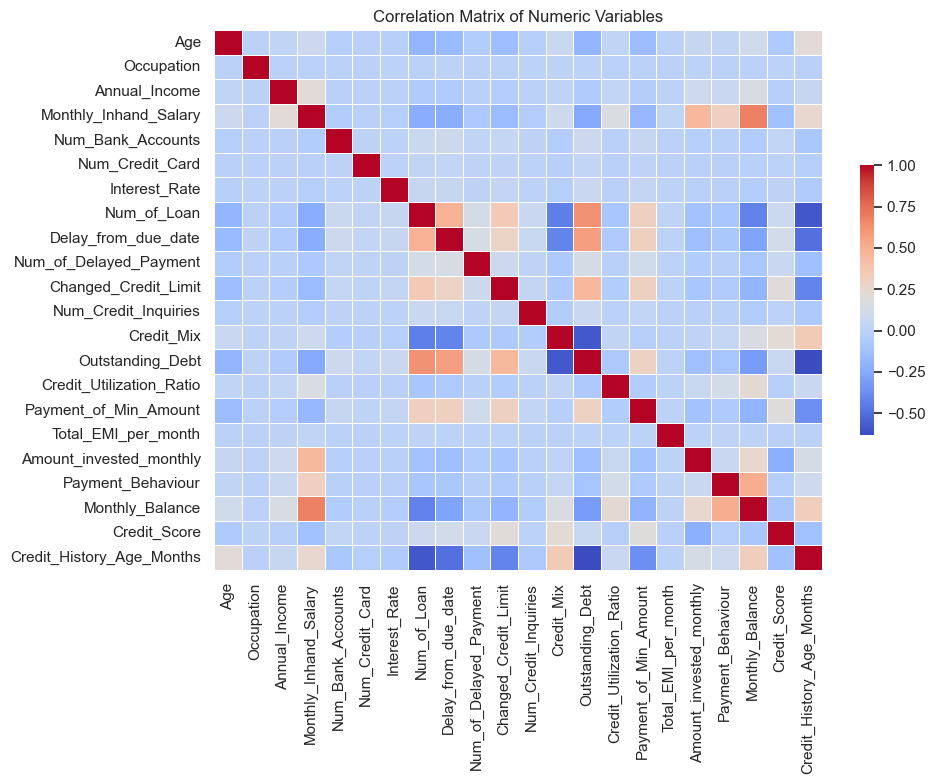

In [100]:
# EN VISTA DE MATRIZ DE CALOR

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=False, cmap="coolwarm", fmt=".2f", linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix of Numeric Variables')
plt.tight_layout()
plt.show()

**40.- SEPARAR LA COLUMNA OBJETIVO CREDIT_SCORE EN "y" Y EL RESTO DE CARACTERISTICAS EN "X":**

In [101]:
X = df.drop("Credit_Score", axis=1)
y = df.Credit_Score

In [102]:
print(X.head())
print(y.head())

   Age  Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0   23          12       19114.12                1824.84                  3   
1   23          12       19114.12                1824.84                  3   
2    5          12       19114.12                1824.84                  3   
3   23          12       19114.12                1824.84                  3   
4   23          12       19114.12                1824.84                  3   

   Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0                4           3.00         4.00                    3   
1                4           3.00         4.00                   -1   
2                4           3.00         4.00                    3   
3                4           3.00         4.00                    5   
4                4           3.00         4.00                    6   

   Num_of_Delayed_Payment  ...  Num_Credit_Inquiries  Credit_Mix  \
0                    7.00  ...

**41.- NORMALIZAR LA VARIABLE OBJETIVO:**

El método value_counts(normalize=True) se utiliza en pandas para contar las ocurrencias de cada valor único en una serie y devolver las proporciones en lugar de los conteos absolutos. Esto es útil para entender la distribución relativa de los valores en la serie.

- Análisis Exploratorio de Datos (EDA): Conocer la distribución relativa de los valores en una serie es crucial para entender el balance de las clases en problemas de clasificación. Si una clase domina la distribución, puede ser un indicio de un problema de desbalanceo de clases.

- Visualización: Las proporciones pueden ser utilizadas para crear gráficos de barras o tartas que representen la distribución de las clases de una manera más intuitiva.

- Validación de Datos: Asegurarse de que las proporciones de los datos son coherentes con las expectativas o requisitos del dominio específico.

In [103]:
y.value_counts(normalize=True)

Credit_Score
2   0.53
1   0.29
0   0.18
Name: proportion, dtype: float64

**SMOTE:**

**La técnica de sobremuestreo SMOTE (Synthetic Minority Oversampling Technique) se utiliza para abordar el problema del desbalanceo de clases generando ejemplos sintéticos de la clase minoritaria. Esto puede ayudar a mejorar el rendimiento de los modelos de machine learning en conjuntos de datos desbalanceados.**

- Mejora del rendimiento del modelo: Los modelos de machine learning suelen rendir mejor con conjuntos de datos equilibrados. SMOTE ayuda a mejorar la capacidad del modelo para aprender patrones de la clase minoritaria.

- Evitar el sobreajuste: Generar muestras sintéticas en lugar de simplemente replicar las existentes ayuda a prevenir el sobreajuste al modelo.

- Equilibrio de clases: Asegura que las clases tengan una representación adecuada en el conjunto de datos, lo que es crucial para muchos algoritmos de machine learning.

En resumen, SMOTE es una técnica efectiva para tratar el desbalanceo de clases al generar muestras sintéticas, mejorando así la calidad y el rendimiento del modelo de machine learning.

In [104]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X, y = smote.fit_resample(X,y)

In [105]:
y.value_counts()

Credit_Score
0    46822
2    46822
1    46822
Name: count, dtype: int64

**DIVIDIR DATOS DE ENTRENAMIENTO Y PRUEBA:**

**La elección del porcentaje ideal para dividir los datos en conjuntos de entrenamiento (train) y prueba (test) depende de varios factores, incluyendo el tamaño del conjunto de datos, el objetivo del análisis y el modelo que se va a utilizar.
No existe un "porcentaje ideal" universal, ya que depende de las características específicas de tu conjunto de datos y del problema que estás tratando de resolver. La clave es asegurarse de que el conjunto de entrenamiento tenga suficiente información para que el modelo aprenda, y que el conjunto de prueba sea representativo y grande suficiente para proporcionar una evaluación significativa del rendimiento del modelo.**

Este código utiliza la función train_test_split de sklearn para dividir un conjunto de datos en conjuntos de entrenamiento y prueba. Aquí se asegura de que la división mantenga la proporción de clases mediante la estratificación.

Proporción de clases en el conjunto de entrenamiento y prueba: La estratificación asegura que la proporción de clases en y se mantenga en ambos conjuntos. Por ejemplo, si y contiene un 70% de una clase y un 30% de otra, esas proporciones se mantendrán en y_train y y_test.

- Mantener la proporción de clases: La estratificación es crucial en problemas de clasificación, especialmente si las clases están desbalanceadas. Ayuda a asegurar que el modelo de machine learning se entrene y se pruebe en datos representativos de todas las clases.

- Reproducibilidad: Establecer un random_state permite que los resultados sean reproducibles, lo que es importante para la experimentación y comparación de modelos.

- Generalización del modelo: Dividir los datos en conjuntos de entrenamiento y prueba permite evaluar cómo se generaliza el modelo a datos no vistos durante el entrenamiento.

En resumen, este código divide los datos en conjuntos de entrenamiento y prueba manteniendo la proporción de clases y asegurando la aleatoriedad y reproducibilidad, lo que es esencial para construir y evaluar modelos de machine learning de manera robusta.

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15,stratify=y, shuffle=True, random_state=42)

In [107]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (119396, 21) (119396,)
Testing set shape: (21070, 21) (21070,)


In [108]:
df["Credit_Score"].value_counts()

Credit_Score
2    46822
1    26077
0    16050
Name: count, dtype: int64

In [109]:
y_train.value_counts() 

Credit_Score
0    39799
1    39799
2    39798
Name: count, dtype: int64

**NORMALIZAR DATOS DE ENTRENAMIENTO Y PRUEBA:**

MinMaxScaler: Esta clase de sklearn escala las características a un rango específico, típicamente entre 0 y 1, utilizando la fórmula:

Xscaled = X − Xmin / Xmax − Xmin

Razón del Escalado:

- Consistencia: Al usar el MinMaxScaler, se asegura que todas las características tengan la misma escala, lo que puede mejorar la convergencia y el rendimiento de muchos algoritmos de machine learning.

- Modelos Sensibles a la Escala: Algoritmos como regresión logística, redes neuronales, y SVM, entre otros, se benefician del escalado de características porque estos modelos son sensibles a la magnitud de las características.

- Normalización: Escalar las características a un rango [0, 1] o [-1, 1] puede ayudar a mejorar la eficiencia de la optimización durante el entrenamiento del modelo.

Conclusión:

El escalado con MinMaxScaler es una técnica esencial para preparar tus datos antes de entrenar modelos de machine learning. Asegúrate de ajustar el escalador solo en el conjunto de entrenamiento y aplicar esa misma transformación al conjunto de prueba para evitar la fuga de datos y mantener la integridad del modelo.

Este código utiliza MinMaxScaler de sklearn para escalar las características de los conjuntos de entrenamiento (X_train) y prueba (X_test). El escalado de características es una etapa importante en el preprocesamiento de datos para muchos algoritmos de machine learning, especialmente aquellos que son sensibles a la escala de los datos, como los modelos basados en distancia (p. ej., KNN, SVM) o los algoritmos de optimización.

In [110]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**EVALUACIÓN DEL RENDIMIENTO DE LOS MODELOS:**

Para evaluar el rendimiento, tanto en el conjunto de entrenamiento como en el conjunto de prueba, se utilizarán las métricas de la matriz de confusión y el informe de clasificación que incluye precisión, recall y F1-score.

 - confusion_matrix(y_test, y_pred): Muestra la matriz de confusión para el conjunto de prueba, que muestra la cantidad de verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos.

 - classification_report(y_test, y_pred): Proporciona un informe detallado con precisión, recall, F1-score y soporte para cada clase en el conjunto de prueba.

**MODELO RED NEURONAL ARTIFICIAL (ANN)**

In [111]:
# Without using BatchNormalization()

modelANN = Sequential([
    Dense(512, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'), 
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(3, activation='softmax')
])
modelANN.compile(optimizer = Adam(learning_rate=0.001), 
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

early_stopping = EarlyStopping(monitor='val_accuracy',
                               patience=60,
                               restore_best_weights=True)
modelANN.fit(x=X_train,
          y=y_train,
          validation_data=(X_test, y_test),
          validation_split=0.1,
          batch_size=512,
          epochs=900,
          verbose=1,
          callbacks=[early_stopping])

Epoch 1/900
234/234 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6400 - loss: 0.8263 - val_accuracy: 0.7306 - val_loss: 0.6701
Epoch 2/900
234/234 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7297 - loss: 0.6892 - val_accuracy: 0.7352 - val_loss: 0.6590
Epoch 3/900
234/234 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7326 - loss: 0.6754 - val_accuracy: 0.7394 - val_loss: 0.6509
Epoch 4/900
234/234 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7368 - loss: 0.6637 - val_accuracy: 0.7387 - val_loss: 0.6478
Epoch 5/900
234/234 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7362 - loss: 0.6612 - val_accuracy: 0.7417 - val_loss: 0.6438
Epoch 6/900
234/234 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7387 - loss: 0.6593 - val_accuracy: 0.7402 - val_loss: 0.6422
Epoch 7/900
234/234 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7392 - loss: 0.6546 - val_accuracy: 0.7421 - val_loss: 0.6376
Epoch 8/900
234/234 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7387 - loss: 0.6534 - val_accu

In [112]:
# PREDICCIONES CON DATOS DE TESTING:
y_predTesting_ANN = modelANN.predict(X_test)
y_predTesting_ANN = y_predTesting_ANN.argmax(axis=1)

# PREDICCIONES CON DATOS DE ENTRENAMIENTO:
y_predTraining_ANN = modelANN.predict(X_train)
y_predTraining_ANN = y_predTraining_ANN.argmax(axis=1)


print("\nRESULTADOS MODELO DE RED NEURONAL ARTIFICIAL ANN1:")

print("\nTEST SET:")
print("\nMATRIZ DE CONFUSIÓN - CON DATOS DE PRUEBA:\n\n",confusion_matrix(y_test, y_predTesting_ANN))
print("\nREPORTE DE CLASIFICACIÓN - CON DATOS DE PRUEBA:\n\n",classification_report(y_test, y_predTesting_ANN))
    
print("\nTRAIN SET:")
print("\nMATRIZ DE CONFUSIÓN - CON DATOS DE ENTRENAMIENTO:\n\n",confusion_matrix(y_train, y_predTraining_ANN))
print("\nREPORTE DE CLASIFICACIÓN - CON DATOS DE ENTRENAMIENTO:\n\n",classification_report(y_train, y_predTraining_ANN))

659/659 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
3732/3732 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step

RESULTADOS MODELO DE RED NEURONAL ARTIFICIAL ANN1:

TEST SET:

MATRIZ DE CONFUSIÓN - CON DATOS DE PRUEBA:

 [[6615   39  369]
 [ 109 6232  682]
 [ 813 1224 4987]]

REPORTE DE CLASIFICACIÓN - CON DATOS DE PRUEBA:

               precision    recall  f1-score   support

           0       0.88      0.94      0.91      7023
           1       0.83      0.89      0.86      7023
           2       0.83      0.71      0.76      7024

    accuracy                           0.85     21070
   macro avg       0.85      0.85      0.84     21070
weighted avg       0.85      0.85      0.84     21070


TRAIN SET:

MATRIZ DE CONFUSIÓN - CON DATOS DE ENTRENAMIENTO:

 [[38969    57   773]
 [  129 37300  2370]
 [ 2690  5447 31661]]

REPORTE DE CLASIFICACIÓN - CON DATOS DE ENTRENAMIENTO:

               precision    recall  f1-score   support

           0       0.93      0.98      0.96     39799
           1       0.87 

In [113]:
modelANN2 = Sequential([
    Dense(512, input_dim=X_train.shape[1], activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(3, activation='softmax')
])
modelANN2.compile(optimizer = Adam(learning_rate=0.001), 
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

early_stopping = EarlyStopping(monitor='val_accuracy',
                               patience=60,
                               restore_best_weights=True)
modelANN2.fit(x=X_train,
          y=y_train,
          validation_data=(X_test, y_test),
          validation_split=0.1,
          batch_size=512,
          epochs=900,
          verbose=1,
          callbacks=[early_stopping])

Epoch 1/900
234/234 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.6518 - loss: 0.8972 - val_accuracy: 0.5672 - val_loss: 0.9140
Epoch 2/900
234/234 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7288 - loss: 0.6936 - val_accuracy: 0.6874 - val_loss: 0.7298
Epoch 3/900
234/234 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7312 - loss: 0.6792 - val_accuracy: 0.7380 - val_loss: 0.6507
Epoch 4/900
234/234 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.7317 - loss: 0.6740 - val_accuracy: 0.7371 - val_loss: 0.6472
Epoch 5/900
234/234 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.7374 - loss: 0.6617 - val_accuracy: 0.7423 - val_loss: 0.6436
Epoch 6/900
234/234 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.7379 - loss: 0.6589 - val_accuracy: 0.7414 - val_loss: 0.6428
Epoch 7/900
234/234 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.7427 - loss: 0.6519 - val_accuracy: 0.7415 - val_loss: 0.6417
Epoch 8/900
234/234 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.7394 - loss: 0.6555 - 

In [114]:
# PREDICCIONES CON DATOS DE TESTING:
y_predTesting_ANN2 = modelANN2.predict(X_test)
y_predTesting_ANN2 = y_predTesting_ANN2.argmax(axis=1)

# PREDICCIONES CON DATOS DE ENTRENAMIENTO:
y_predTraining_ANN2 = modelANN2.predict(X_train)
y_predTraining_ANN2 = y_predTraining_ANN2.argmax(axis=1)

print("\nRESULTADOS MODELO DE RED NEURONAL ARTIFICIAL ANN2:")

print("\nTEST SET:")
print("\nMATRIZ DE CONFUSIÓN - CON DATOS DE PRUEBA:\n\n",confusion_matrix(y_test, y_predTesting_ANN2))
print("\nREPORTE DE CLASIFICACIÓN - CON DATOS DE PRUEBA:\n\n",classification_report(y_test, y_predTesting_ANN2))
    
print("\nTRAIN SET:")
print("\nMATRIZ DE CONFUSIÓN - CON DATOS DE ENTRENAMIENTO:\n\n",confusion_matrix(y_train, y_predTraining_ANN2))
print("\nREPORTE DE CLASIFICACIÓN - CON DATOS DE ENTRENAMIENTO:\n\n",classification_report(y_train, y_predTraining_ANN2))

659/659 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
3732/3732 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step

RESULTADOS MODELO DE RED NEURONAL ARTIFICIAL ANN2:

TEST SET:

MATRIZ DE CONFUSIÓN - CON DATOS DE PRUEBA:

 [[6677   20  326]
 [ 127 6258  638]
 [ 951 1237 4836]]

REPORTE DE CLASIFICACIÓN - CON DATOS DE PRUEBA:

               precision    recall  f1-score   support

           0       0.86      0.95      0.90      7023
           1       0.83      0.89      0.86      7023
           2       0.83      0.69      0.75      7024

    accuracy                           0.84     21070
   macro avg       0.84      0.84      0.84     21070
weighted avg       0.84      0.84      0.84     21070


TRAIN SET:

MATRIZ DE CONFUSIÓN - CON DATOS DE ENTRENAMIENTO:

 [[38734    51  1014]
 [  319 37186  2294]
 [ 3966  5786 30046]]

REPORTE DE CLASIFICACIÓN - CON DATOS DE ENTRENAMIENTO:

               precision    recall  f1-score   support

           0       0.90      0.97      0.94     39799
           1       0.86 

**CLASIFICADOR CREDIT SCORE CON RED NEURONAL PERCEPTRÓN MULTICAPA (MLP)**

In [115]:
# Crear un clasificador de tipo MLPClassifier con dos capas ocultas de 100 neuronas cada una
# Usar la función de activación 'relu' y el optimizador 'adam'

mlp = MLPClassifier(hidden_layer_sizes = (128,128), activation = 'relu', solver = 'adam')

# Usar el método 'fit()' para entrenar el clasificador
# Entrenar el clasificador con los datos de entrenamiento 'X_train' y 'y_train'

mlp.fit(X_train, y_train)

# Predecir las etiquetas de los datos de prueba 'X_test' usando el método 'predict()' del clasificador entrenado

# PREDICCIONES CON DATOS DE TESTING:
y_predTesting_mlp = mlp.predict(X_test)

# PREDICCIONES CON DATOS DE ENTRENAMIENTO:
y_predTraining_mlp = mlp.predict(X_train)

print("\nRESULTADOS MODELO DE RED NEURONAL PERCEPTRÓN MULTICAPA MLP:")

print("\nTEST SET:")
print("\nMATRIZ DE CONFUSIÓN - CON DATOS DE PRUEBA:\n\n",confusion_matrix(y_test, y_predTesting_mlp))
print("\nREPORTE DE CLASIFICACIÓN - CON DATOS DE PRUEBA:\n\n",classification_report(y_test, y_predTesting_mlp))
    
print("\nTRAIN SET:")
print("\nMATRIZ DE CONFUSIÓN - CON DATOS DE ENTRENAMIENTO:\n\n",confusion_matrix(y_train, y_predTraining_mlp))
print("\nREPORTE DE CLASIFICACIÓN - CON DATOS DE ENTRENAMIENTO:\n\n",classification_report(y_train, y_predTraining_mlp))



RESULTADOS MODELO DE RED NEURONAL PERCEPTRÓN MULTICAPA MLP:

TEST SET:

MATRIZ DE CONFUSIÓN - CON DATOS DE PRUEBA:

 [[6331  139  553]
 [ 370 5475 1178]
 [1127 1118 4779]]

REPORTE DE CLASIFICACIÓN - CON DATOS DE PRUEBA:

               precision    recall  f1-score   support

           0       0.81      0.90      0.85      7023
           1       0.81      0.78      0.80      7023
           2       0.73      0.68      0.71      7024

    accuracy                           0.79     21070
   macro avg       0.79      0.79      0.78     21070
weighted avg       0.79      0.79      0.78     21070


TRAIN SET:

MATRIZ DE CONFUSIÓN - CON DATOS DE ENTRENAMIENTO:

 [[36938   462  2399]
 [ 1855 32339  5605]
 [ 5162  5472 29164]]

REPORTE DE CLASIFICACIÓN - CON DATOS DE ENTRENAMIENTO:

               precision    recall  f1-score   support

           0       0.84      0.93      0.88     39799
           1       0.84      0.81      0.83     39799
           2       0.78      0.73      0.76  

In [116]:
mlp2 = MLPClassifier(hidden_layer_sizes = (256,256), activation = 'relu', solver = 'adam')

mlp2.fit(X_train, y_train)

# PREDICCIONES CON DATOS DE TESTING:
y_predTesting_mlp2 = mlp2.predict(X_test)

# PREDICCIONES CON DATOS DE ENTRENAMIENTO:
y_predTraining_mlp2 = mlp2.predict(X_train)

print("\nRESULTADOS MODELO DE RED NEURONAL PERCEPTRÓN MULTICAPA MLP2:")

print("\nTEST SET:")
print("\nMATRIZ DE CONFUSIÓN - CON DATOS DE PRUEBA:\n\n",confusion_matrix(y_test, y_predTesting_mlp2))
print("\nREPORTE DE CLASIFICACIÓN - CON DATOS DE PRUEBA:\n\n",classification_report(y_test, y_predTesting_mlp2))
    
print("\nTRAIN SET:")
print("\nMATRIZ DE CONFUSIÓN - CON DATOS DE ENTRENAMIENTO:\n\n",confusion_matrix(y_train, y_predTraining_mlp2))
print("\nREPORTE DE CLASIFICACIÓN - CON DATOS DE ENTRENAMIENTO:\n\n",classification_report(y_train, y_predTraining_mlp2))


RESULTADOS MODELO DE RED NEURONAL PERCEPTRÓN MULTICAPA MLP2:

TEST SET:

MATRIZ DE CONFUSIÓN - CON DATOS DE PRUEBA:

 [[6538   95  390]
 [ 223 5807  993]
 [1030 1115 4879]]

REPORTE DE CLASIFICACIÓN - CON DATOS DE PRUEBA:

               precision    recall  f1-score   support

           0       0.84      0.93      0.88      7023
           1       0.83      0.83      0.83      7023
           2       0.78      0.69      0.73      7024

    accuracy                           0.82     21070
   macro avg       0.82      0.82      0.81     21070
weighted avg       0.82      0.82      0.81     21070


TRAIN SET:

MATRIZ DE CONFUSIÓN - CON DATOS DE ENTRENAMIENTO:

 [[39067   132   600]
 [  588 36168  3043]
 [ 3239  3599 32960]]

REPORTE DE CLASIFICACIÓN - CON DATOS DE ENTRENAMIENTO:

               precision    recall  f1-score   support

           0       0.91      0.98      0.94     39799
           1       0.91      0.91      0.91     39799
           2       0.90      0.83      0.86 

**TRES MODELOS EN GRUPO:**

**MODELO DE REGRESIÓN LOGÍSTICA MULTINOMIAL:**

In [117]:
log_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=900)
log_model.fit(X_train, y_train)

# PREDICCIONES CON DATOS DE TESTING:
y_predTesting_log = log_model.predict(X_test)

# PREDICCIONES CON DATOS DE ENTRENAMIENTO:
y_predTraining_log = log_model.predict(X_train)

print("\nRESULTADOS MODELO DE REGRESIÓN LOGÍSTICA MULTINOMIAL:")

print("\nTEST SET:")
print("\nMATRIZ DE CONFUSIÓN - CON DATOS DE PRUEBA:\n\n",confusion_matrix(y_test, y_predTesting_log))
print("\nREPORTE DE CLASIFICACIÓN - CON DATOS DE PRUEBA:\n\n",classification_report(y_test, y_predTesting_log))
    
print("\nTRAIN SET:")
print("\nMATRIZ DE CONFUSIÓN - CON DATOS DE ENTRENAMIENTO:\n\n",confusion_matrix(y_train, y_predTraining_log))
print("\nREPORTE DE CLASIFICACIÓN - CON DATOS DE ENTRENAMIENTO:\n\n",classification_report(y_train, y_predTraining_log))


RESULTADOS MODELO DE REGRESIÓN LOGÍSTICA MULTINOMIAL:

TEST SET:

MATRIZ DE CONFUSIÓN - CON DATOS DE PRUEBA:

 [[5988  122  913]
 [ 913 4398 1712]
 [1597 1549 3878]]

REPORTE DE CLASIFICACIÓN - CON DATOS DE PRUEBA:

               precision    recall  f1-score   support

           0       0.70      0.85      0.77      7023
           1       0.72      0.63      0.67      7023
           2       0.60      0.55      0.57      7024

    accuracy                           0.68     21070
   macro avg       0.68      0.68      0.67     21070
weighted avg       0.68      0.68      0.67     21070


TRAIN SET:

MATRIZ DE CONFUSIÓN - CON DATOS DE ENTRENAMIENTO:

 [[34022   726  5051]
 [ 5405 24869  9525]
 [ 8661  8690 22447]]

REPORTE DE CLASIFICACIÓN - CON DATOS DE ENTRENAMIENTO:

               precision    recall  f1-score   support

           0       0.71      0.85      0.77     39799
           1       0.73      0.62      0.67     39799
           2       0.61      0.56      0.58     397

**MODELO DE RANDOM FOREST MULTICLASE:**

In [118]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=900) # 512
rf_model.fit(X_train, y_train)

# PREDICCIONES CON DATOS DE TESTING:
y_predTesting_rf = rf_model.predict(X_test)

# PREDICCIONES CON DATOS DE ENTRENAMIENTO:
y_predTraining_rf = rf_model.predict(X_train)

print("\nRESULTADOS MODELO DE RANDOM FOREST MULTICLASE:")

print("\nTEST SET:")
print("\nMATRIZ DE CONFUSIÓN - CON DATOS DE PRUEBA:\n\n",confusion_matrix(y_test, y_predTesting_rf))
print("\nREPORTE DE CLASIFICACIÓN - CON DATOS DE PRUEBA:\n\n",classification_report(y_test, y_predTesting_rf))
    
print("\nTRAIN SET:")
print("\nMATRIZ DE CONFUSIÓN - CON DATOS DE ENTRENAMIENTO:\n\n",confusion_matrix(y_train, y_predTraining_rf))
print("\nREPORTE DE CLASIFICACIÓN - CON DATOS DE ENTRENAMIENTO:\n\n",classification_report(y_train, y_predTraining_rf))


RESULTADOS MODELO DE RANDOM FOREST MULTICLASE:

TEST SET:

MATRIZ DE CONFUSIÓN - CON DATOS DE PRUEBA:

 [[6752    8  263]
 [ 145 6452  426]
 [ 687  923 5414]]

REPORTE DE CLASIFICACIÓN - CON DATOS DE PRUEBA:

               precision    recall  f1-score   support

           0       0.89      0.96      0.92      7023
           1       0.87      0.92      0.90      7023
           2       0.89      0.77      0.82      7024

    accuracy                           0.88     21070
   macro avg       0.88      0.88      0.88     21070
weighted avg       0.88      0.88      0.88     21070


TRAIN SET:

MATRIZ DE CONFUSIÓN - CON DATOS DE ENTRENAMIENTO:

 [[39799     0     0]
 [    0 39799     0]
 [    0     0 39798]]

REPORTE DE CLASIFICACIÓN - CON DATOS DE ENTRENAMIENTO:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     39799
           1       1.00      1.00      1.00     39799
           2       1.00      1.00      1.00     39798

   

**MODELO DE REDES NEURONALES MULTICLASE:**

In [119]:
nn_model = Sequential()
nn_model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
nn_model.add(Dense(8, activation='relu'))
nn_model.add(Dense(3, activation='softmax'))
nn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
nn_model.fit(X_train, y_train, epochs=900, batch_size=512, validation_split=0.1, verbose=1)

Epoch 1/900
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4492 - loss: 1.0433 - val_accuracy: 0.6837 - val_loss: 0.7930
Epoch 2/900
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6896 - loss: 0.7764 - val_accuracy: 0.7101 - val_loss: 0.7305
Epoch 3/900
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7123 - loss: 0.7319 - val_accuracy: 0.7178 - val_loss: 0.7065
Epoch 4/900
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7196 - loss: 0.7128 - val_accuracy: 0.7261 - val_loss: 0.6946
Epoch 5/900
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7230 - loss: 0.7017 - val_accuracy: 0.7274 - val_loss: 0.6884
Epoch 6/900
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7240 - loss: 0.6995 - val_accuracy: 0.7270 - val_loss: 0.6846
Epoch 7/900
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7269 - loss: 0.6922 - val_accuracy: 0.7273 - val_loss: 0.6819
Epoch 8/900
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7263 - loss: 0.6909 - val_accu

In [120]:
# PREDICCIONES CON DATOS DE TESTING:
y_predTesting_nn = nn_model.predict(X_test).argmax(axis=-1)

# PREDICCIONES CON DATOS DE ENTRENAMIENTO:
y_predTraining_nn = nn_model.predict(X_train).argmax(axis=-1)

print("\nRESULTADOS MODELO DE REDES NEURONALES MULTICLASE:")

print("\nTEST SET:")
print("\nMATRIZ DE CONFUSIÓN - CON DATOS DE PRUEBA:\n\n",confusion_matrix(y_test, y_predTesting_nn))
print("\nREPORTE DE CLASIFICACIÓN - CON DATOS DE PRUEBA:\n\n",classification_report(y_test, y_predTesting_nn))
    
print("\nTRAIN SET:")
print("\nMATRIZ DE CONFUSIÓN - CON DATOS DE ENTRENAMIENTO:\n\n",confusion_matrix(y_train, y_predTraining_nn))
print("\nREPORTE DE CLASIFICACIÓN - CON DATOS DE ENTRENAMIENTO:\n\n",classification_report(y_train, y_predTraining_nn))

659/659 ━━━━━━━━━━━━━━━━━━━━ 1s 916us/step
3732/3732 ━━━━━━━━━━━━━━━━━━━━ 3s 792us/step

RESULTADOS MODELO DE REDES NEURONALES MULTICLASE:

TEST SET:

MATRIZ DE CONFUSIÓN - CON DATOS DE PRUEBA:

 [[6254  141  628]
 [ 863 5444  716]
 [1295 1630 4099]]

REPORTE DE CLASIFICACIÓN - CON DATOS DE PRUEBA:

               precision    recall  f1-score   support

           0       0.74      0.89      0.81      7023
           1       0.75      0.78      0.76      7023
           2       0.75      0.58      0.66      7024

    accuracy                           0.75     21070
   macro avg       0.75      0.75      0.74     21070
weighted avg       0.75      0.75      0.74     21070


TRAIN SET:

MATRIZ DE CONFUSIÓN - CON DATOS DE ENTRENAMIENTO:

 [[35468   865  3466]
 [ 4915 30958  3926]
 [ 7104  9182 23512]]

REPORTE DE CLASIFICACIÓN - CON DATOS DE ENTRENAMIENTO:

               precision    recall  f1-score   support

           0       0.75      0.89      0.81     39799
           1       0.